| Model Group                   | Model Name                    | Link | Viable | Dependencies                                     | Input Requirements                             | Additional Preprocessing/Data Formats                                    | Data Type    | Complexity | Training Time |
|-------------------------------|-------------------------------|------|--------|--------------------------------------------------|------------------------------------------------|---------------------------------------------------|---------------|------------|---------------|
| Hybrid Models                 | Prophet                       | [Link](#) | Yes    | Python Native (Stan backend)                     | 2D shape (timestamp, data)                     | Dataframe with 'ds' (date) and 'y' (value) columns | Univariate   | Low        | Moderate      |
| Hybrid Models                 | Flow Forecast                 | [Link](#) | Yes    | PyTorch                                          | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | Moderate   | High          |
| Hybrid Models                 | DeepTime                      | [Link](#) | Yes    | ?                                                | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | High       | High          |
| Machine Learning Models       | XGBoost                       | [Link](#) | Yes    | Python Native                                    | 2D shape (data, features)                      | Requires numerical input, handles missing values   | Both         | Moderate   | Moderate      |
| Machine Learning Models       | LightGBM                      | [Link](#) | Yes    | Python Native                                    | 2D shape (data, features)                      | Requires numerical input, handles missing values   | Both         | Moderate   | Moderate      |
| Machine Learning Models       | AutoTS                        | [Link](#) | Yes    | ?                                                | 2D shape (timestamp, data)                     | Requires a univariate time series                  | Univariate   | Low        | Low           |
| Machine Learning Models       | PyCaret                       | [Link](#) | Yes    | Python Native (Multiple backend models)          | 2D shape (data, features)                      | Automatic preprocessing, handles categorical features and missing values | Both         | Low        | Low           |
| Neural Network Models         | LSTM                          | [Link](#) | Yes    | TensorFlow, Keras, PyTorch (depends on implementation) | 3D shape (timestamp, data, features)           | Requires data normalization, sequences of fixed length | Both         | High       | High          |
| Neural Network Models         | TCN                           | [Link](#) | Yes    | TensorFlow, Keras, PyTorch (depends on implementation) | 3D shape (timestamp, data, features)           | Requires data normalization, sequences of fixed length | Both         | High       | High          |
| Neural Network Models         | Temporal Fusion Transformer  | [Link](#) | Yes    | TensorFlow                                       | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | High       | High          |
| Traditional Statistical Models| GARCH                         | [Link](#) | Yes    | Python Native (often via libraries like `arch`)  | 2D shape (timestamp, data)                     | Requires stationary data, handles missing values    | Univariate   | Low        | Low           |
| Traditional Statistical Models| Linear Regression             | [Link](#) | Yes    | Python Native (often via libraries like `scikit-learn`) | 2D shape (data, features)                      | Requires numerical input                             | Both         | Low        | Low           |
| Traditional Statistical Models| Auto-Arima                    | [Link](#) | Yes    | Python Native (often via libraries like `pmdarima`) | 2D shape (timestamp, data)                     | Requires stationary data                             | Univariate   | Moderate   | Moderate      |
| Traditional Statistical Models| Markov Chains                 | [Link](#) | Yes    | Python Native                                    | 2D shape (states, transition probabilities)    | Requires state transition matrix                    | Both         | Low        | Low           |


## <font color= blue >1. Importing the Necessary Libraries</font> <a class="anchor" id="second-bullet"></a>
--------------------------------------------------------------

In [3]:
!pip install requests
!pip install numpy
!pip install pandas
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install cryptocmd
!pip install prettytable
!pip install joblib
!pip install scikit-learn
!pip install lightgbm
!pip install xgboost
!pip install statsmodels
!pip install pmdarima
!pip install arch
!pip install tensorflow
!pip install keras-tuner
!pip install bokeh
!pip install solenium

ERROR: Could not find a version that satisfies the requirement solenium (from versions: none)
ERROR: No matching distribution found for solenium


In [29]:
# Standard library imports
import os
import time
import sys
import warnings
import logging
import pickle
from typing import Optional
from datetime import datetime, timedelta
from math import pi

# Third-party imports
import requests
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper
from prettytable import PrettyTable
import joblib
from joblib import dump, load
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from pmdarima import auto_arima
from arch import arch_model
from pandas.tseries.holiday import USFederalHolidayCalendar
from scipy.signal import detrend
import xgboost as xgb
#from selenium import webdriver

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Dropout, LSTM, TimeDistributed, Conv1D, MaxPooling1D, Flatten,
                                    ConvLSTM2D, BatchNormalization, GRU)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2, l1_l2
from keras_tuner import HyperModel, RandomSearch
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_tuner.tuners import BayesianOptimization

# Plotting and Visualization
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import (HoverTool, ColumnDataSource, WheelZoomTool, Span, Range1d,
                          FreehandDrawTool, MultiLine, NumeralTickFormatter, Button, CustomJS)
from bokeh.layouts import column, row
from bokeh.io import curdoc, export_png
from bokeh.models.widgets import CheckboxGroup
from bokeh.themes import Theme
from bokeh.io.export import get_screenshot_as_png
from IPython.core.display import display, HTML
import hashlib


# Other settings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.3f}'.format)
logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
logger = logging.getLogger(__name__)
display(HTML("<style>.bk-root { margin-left: auto; margin-right: auto; }</style>"))


print("Hello Everyone")

Hello Everyone


# Block 1. - CryptoData
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
class CryptoData:
    def __init__(self, crypto_symbol: str):
        logging.info("Initializing CryptoData class")
        self.crypto_symbol = crypto_symbol

    def _validate_data(self, df: pd.DataFrame) -> Optional[pd.DataFrame]:
        """
        Validates the integrity of the fetched data.

        :param df: The fetched DataFrame
        :return: The validated DataFrame or raises a ValueError if validation fails
        """
        # Check for missing values
        if df.isnull().any().any():
            raise ValueError("The fetched data contains missing values.")

        # Check for expected columns
        expected_columns = {'Date', 'Open', 'High', 'Low', 'Close', 'Market Cap', 'Volume'}
        if not expected_columns.issubset(df.columns):
            raise ValueError("Some expected columns are missing in the data.")

        # Ensure all columns except 'Date' are numeric
        for col in df.columns:
            if col != 'Date' and not pd.api.types.is_numeric_dtype(df[col]):
                raise ValueError(f"Column {col} is not of numeric type in the fetched data.")

        return df

    def _fetch_cryptocmd_data(self, retries: int = 5, backoff_factor: float = 0.3) -> pd.DataFrame:
        """
        Fetches cryptocurrency data with retries and exponential backoff.

        :param retries: The maximum number of retries before giving up
        :param backoff_factor: The factor by which the wait time is increased between each retry
        :return: The fetched DataFrame
        """
        for retry in range(retries):
            try:
                scraper = CmcScraper(self.crypto_symbol)
                df = scraper.get_dataframe()
                # Validate the fetched data
                return self._validate_data(df)

            except Exception as e:
                logging.error(f'An error occurred while fetching data: {e}')
                # Wait for a certain amount of time before retrying
                sleep_time = backoff_factor * (2 ** retry)
                time.sleep(sleep_time)
                logging.info(f'Retrying... (Attempt {retry + 1}/{retries})')
        else:
            raise Exception('Max retries reached. Could not fetch the data.')

    def get_cryptocmd_data(self) -> pd.DataFrame:
        logging.info(f"Getting {self.crypto_symbol} data")
        df = self._fetch_cryptocmd_data()
        df.set_index('Date', inplace=True)
        df.index = pd.to_datetime(df.index)
        logging.info(f"Data obtained successfully for {self.crypto_symbol}")
        df = df.iloc[::-1]
        return df.round(2)

    @staticmethod
    def _format_monetary_value(value: float) -> str:
        return "${:,.2f}".format(value)

    @staticmethod
    def _format_volume_value(value: float) -> str:
        if value > 1e9:
            return "{:.2f}B".format(value/1e9)
        elif value > 1e6:
            return "{:.2f}M".format(value/1e6)
        else:
            return "{:,.2f}".format(value)

    def get_display_data(self) -> pd.DataFrame:
        logging.info(f"Formatting display data for {self.crypto_symbol}")
        display_df = self.get_cryptocmd_data().copy()
        monetary_columns = ['Open', 'High', 'Low', 'Close']
        display_df[monetary_columns] = display_df[monetary_columns].applymap(self._format_monetary_value)
        volume_like_columns = ['Volume', 'Market Cap']
        display_df[volume_like_columns] = display_df[volume_like_columns].applymap(self._format_volume_value)
        logging.info(f"Display data formatted successfully for {self.crypto_symbol}")
        return display_df

In [3]:
# Example usage
crypto = CryptoData("BTC")
data = crypto.get_cryptocmd_data()
data.info()
data

2023-09-02 21:05:07,787 [INFO] - Initializing CryptoData class
2023-09-02 21:05:07,788 [INFO] - Getting BTC data
2023-09-02 21:05:10,796 [INFO] - Data obtained successfully for BTC


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3779 entries, 2013-04-28 to 2023-09-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3779 non-null   float64
 1   High        3779 non-null   float64
 2   Low         3779 non-null   float64
 3   Close       3779 non-null   float64
 4   Volume      3779 non-null   float64
 5   Market Cap  3779 non-null   float64
dtypes: float64(6)
memory usage: 206.7 KB


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,136.690,143.370,110.850,127.950,25956.840,1419007893.660
2013-04-29,134.440,147.490,134.000,144.540,0.000,1603768864.500
2013-04-30,144.000,146.930,134.050,139.000,0.000,1542813125.000
2013-05-01,139.000,139.890,107.720,116.990,0.000,1298954593.750
2013-05-02,116.380,125.600,92.280,105.210,0.000,1168517495.250
...,...,...,...,...,...,...
2023-08-28,26089.610,26198.580,25880.600,26106.150,11002805166.450,508288516574.200
2023-08-29,26102.490,28089.340,25912.630,27727.390,29368391711.990,539882481562.260
2023-08-30,27726.080,27760.160,27069.210,27297.270,16343655235.340,531528938704.340


# Block 2 - CryptoAnalytics - just df's
-------------------------------------------------------------------------------------

In [7]:
class CryptoAnalytics_IMP:
    """
    This class is responsible for performing enhanced analytics on cryptocurrency data.

    Input:
        df (pd.DataFrame): The DataFrame containing the cryptocurrency data.

    Methods:
        ...
    """
    def __init__(self, crypto_data: pd.DataFrame, output_dir: str = 'assets_analytics'):
        logging.info("Initializing CryptoAnalytics_IMP class")
        self.df = crypto_data
        self.output_dir = output_dir
        self._create_output_dir()

    def _create_output_dir(self):
        """Create output directory if it doesn't exist."""
        if not os.path.exists(self.output_dir):
            try:
                os.makedirs(self.output_dir)
            except Exception as e:
                logging.error(f"Failed to create output directory: {e}")
                raise

    def calculate_volatility(self, column: str = 'Close', window: int = 30) -> pd.DataFrame:
        """Calculates historical volatility."""

        # Scaling: Perform basic checks before calculation
        if len(self.df) < window:
            logging.error("Data length is less than the rolling window size. Cannot calculate volatility.")
            raise ValueError("Insufficient data for volatility calculation.")

        # Ensure there are no NaN values in the 'Close' column
        if self.df[column].isna().any():
            logging.warning("There are NaN values in the 'Close' column.")

        try:
            log_ret = np.log(self.df[column] / self.df[column].shift(1))
        except Exception as e:
            logging.error(f"Error occurred while calculating log returns: {e}")
            raise

        # Check for NaN values in log returns
        if log_ret.isna().any():
            logging.warning("There are NaN values in the log returns.")

        try:
            volatility = log_ret.rolling(window=window).std() * np.sqrt(252)  # annualize
        except Exception as e:
            logging.error(f"Error occurred while calculating volatility: {e}")
            raise

        # Check if all computed volatilities are NaN
        if volatility.isna().all():
            logging.warning(f"All computed volatilities are NaN. Data length: {len(self.df)}, Window size: {window}.")
        elif volatility.isna().any():
            logging.warning(f"Some computed volatilities are NaN. Data length: {len(self.df)}, Window size: {window}.")

        return pd.DataFrame(volatility, columns=['Historical Volatility'])

    def _time_based_analysis(self, freq: str):
        """Helper function to perform time-based analysis."""
        logging.info(f"Getting {freq} analysis")
        data = self.df.resample(freq).agg({'Close': ['last', 'mean', 'max', 'min'], 'Open': 'first'})
        data.columns = data.columns.map('_'.join).str.strip('_')
        data = self.calculate_variation(data)
        return data

    def calculate_variation(self, data: pd.DataFrame):
        logging.info("Calculating variation")
        data['variation_$_abs'] = data['Close_last'] - data['Open_first']
        data['variation_%_rel'] = ((data['Close_last'] - data['Open_first']) / data['Open_first']) * 100
        return data

    def get_all_time_records(self):
        logging.info("Getting all-time records")
        all_time_high = self.df['Close'].max()
        all_time_low = self.df['Close'].min()
        all_time_high_date = self.df['Close'].idxmax().strftime('%Y-%m-%d')
        all_time_low_date = self.df['Close'].idxmin().strftime('%Y-%m-%d')
        return all_time_high, all_time_low, all_time_high_date, all_time_low_date

    def get_yearly_analysis(self):
        return self._time_based_analysis('Y')

    def get_monthly_analysis(self):
        return self._time_based_analysis('M')

    def get_weekly_analysis(self):
        return self._time_based_analysis('W')

    def display_all_analyses(self):
        logging.info("Displaying all analyses")
        all_time_high, all_time_low, all_time_high_date, all_time_low_date = self.get_all_time_records()
        print(f"All Time High: {all_time_high:,.2f} (Date: {all_time_high_date})")
        print(f"All Time Low: {all_time_low:,.2f} (Date: {all_time_low_date})")
        print("\nYearly Analysis:")
        print(self.get_yearly_analysis())
        print("\nMonthly Analysis:")
        print(self.get_monthly_analysis())
        print("\nWeekly Analysis:")
        print(self.get_weekly_analysis())

    def run_all_analyses_and_save(self):
        all_time_high, all_time_low, all_time_high_date, all_time_low_date = self.get_all_time_records()
        print(f"All Time High: {all_time_high} on {all_time_high_date}")
        print(f"All Time Low: {all_time_low} on {all_time_low_date}")

        # Run all analysis methods and save the results
        self.save_analysis_to_csv(self.get_yearly_analysis(), 'yearly_data.csv')
        self.save_analysis_to_csv(self.get_monthly_analysis(), 'monthly_data.csv')
        self.save_analysis_to_csv(self.get_weekly_analysis(), 'weekly_data.csv')
        print("All analyses have been saved.")

    def save_analysis_to_csv(self, analysis: pd.DataFrame, filename: str):
        filepath = os.path.join(self.output_dir, filename)
        try:
            analysis.to_csv(filepath)
        except Exception as e:
            logging.error(f"Failed to save analysis to {filepath}: {e}")
            raise
        logging.info(f'Analysis saved to {filepath}')


In [8]:
# Create an instance of the CryptoAnalytics_IMP class
#analytics = CryptoAnalytics_IMP(data, output_dir='my_custom_directory')
analytics = CryptoAnalytics_IMP(data)
all_time_high, all_time_low, all_time_high_date, all_time_low_date = analytics.get_all_time_records()

# Call the get_all_time_records method
print(f"All Time High: {all_time_high} on {all_time_high_date}")
print(f"All Time Low: {all_time_low} on {all_time_low_date}")

# Analytics DF
yearly_data = analytics.get_yearly_analysis()
monthly_data = analytics.get_monthly_analysis()
weekly_data = analytics.get_weekly_analysis()
display(yearly_data,monthly_data,weekly_data)
analytics.run_all_analyses_and_save()

All Time High: 67566.83 on 2021-11-08
All Time Low: 68.43 on 2013-07-05


,Close_last,Close_mean,Close_max,Close_min,Open_first,variation_$_abs,variation_%_rel
Date,,,,,,,
2013-12-31,754.010,257.449,1151.170,68.430,136.690,617.320,451.620
2014-12-31,320.190,527.237,953.290,310.740,754.970,-434.780,-57.589
2015-12-31,430.570,272.453,465.320,178.100,320.430,110.140,34.373
2016-12-31,963.740,568.492,975.920,364.330,430.720,533.020,123.751
2017-12-31,14156.400,4006.034,19497.400,777.760,963.660,13192.740,1369.024
2018-12-31,3742.700,7572.299,17527.000,3236.760,14112.200,-10369.500,-73.479
2019-12-31,7193.600,7395.247,13016.230,3399.470,3746.710,3446.890,91.998
2020-12-31,29001.720,11116.378,29001.720,4970.790,7194.890,21806.830,303.088
2021-12-31,46306.450,47436.932,67566.830,29374.150,28994.010,17312.440,59.710


,Close_last,Close_mean,Close_max,Close_min,Open_first,variation_$_abs,variation_%_rel
Date,,,,,,,
2013-04-30,139.000,137.163,144.540,127.950,136.690,2.310,1.690
2013-05-31,129.000,119.993,133.480,97.750,139.000,-10.000,-7.194
2013-06-30,96.610,107.761,129.300,94.650,128.820,-32.210,-25.004
2013-07-31,106.090,90.512,107.990,68.430,97.510,8.580,8.799
2013-08-31,135.350,113.905,135.350,102.800,106.210,29.140,27.436
...,...,...,...,...,...,...,...
2023-05-31,27219.660,27499.307,29534.380,26334.820,29227.100,-2007.440,-6.868
2023-06-30,30477.250,27763.199,30695.470,25124.680,27218.410,3258.840,11.973
2023-07-31,29230.110,30057.470,31476.050,29176.920,30471.850,-1241.740,-4.075


,Close_last,Close_mean,Close_max,Close_min,Open_first,variation_$_abs,variation_%_rel
Date,,,,,,,
2013-04-28,127.950,127.950,127.950,127.950,136.690,-8.740,-6.394
2013-05-05,115.910,118.843,144.540,97.750,134.440,-18.530,-13.783
2013-05-12,115.000,113.926,117.200,111.500,115.980,-0.980,-0.845
2013-05-19,121.990,118.709,123.500,111.500,114.820,7.170,6.245
2013-05-26,133.480,127.733,133.480,122.000,122.500,10.980,8.963
...,...,...,...,...,...,...,...
2023-08-06,29041.860,29199.223,29675.730,29041.860,29278.310,-236.450,-0.808
2023-08-13,29282.910,29433.391,29765.490,29180.580,29038.510,244.400,0.842
2023-08-20,26189.580,27468.637,29408.440,26049.560,29283.260,-3093.680,-10.565


All Time High: 67566.83 on 2021-11-08
All Time Low: 68.43 on 2013-07-05
All analyses have been saved.


# Block 3. - Crypto Visualization
---------------------------------------------------------

In [9]:
class CryptoAnalyticsVisual:
    """
    A class to provide comprehensive analysis and visualization of cryptocurrency data.

    Attributes:
    -----------
    data : pd.DataFrame
        The cryptocurrency dataset containing columns like Open, Close, High, Low, etc.
    Methods:
    --------
    _add_drawing_and_reset_tools(p, line_source):  ----  Adds freehand drawing and reset tools to the Bokeh plot.

    calculate_macd(short_window=12, long_window=26, signal_window=9):  ----  Calculate the Moving Average Convergence Divergence (MACD) and signal line.
    plot_macd_bokeh():  ----  Plot MACD and signal line using Bokeh.

    calculate_rsi(window=14):  ----  Calculate the Relative Strength Index (RSI).
    plot_rsi_bokeh():  ----  Plot RSI using Bokeh.

    calculate_bollinger_bands(window=20, num_std=2):  ----  Calculate upper and lower Bollinger Bands.
    plot_bollinger_bands_bokeh():  ----  Plot Bollinger Bands and Close Price using Bokeh.

    calculate_fibonacci_retracement():  ----  Calculate Fibonacci retracement levels.
    plot_fibonacci_retracement_bokeh():  ----  Plot Fibonacci retracement levels using Bokeh.

    volume_analysis():  ----  Analyze volume data, and compute average volume over 30 days.
    plot_volume_analysis_bokeh():  ----  Plot volume and 30-day average volume using Bokeh.

    _identify_trend(column='Close'):  ----  Identify trend based on multiple moving averages.
    plot_trend_bokeh():  ----  Plot trends based on moving averages using Bokeh

    create_candlestick_chart(time_period='last_month', ma_period=20):  ----  Create a candlestick chart with optional moving average overlay.
    _select_data(time_period):  ----  Select data based on a specified time period (e.g., 'last_month', 'last_3_months').
    """
    def __init__(self, data: pd.DataFrame):
        self.data = data
        output_notebook()
        curdoc().theme = 'dark_minimal'
        logger.info('CryptoAnalyticsV2 instance created and initialized.')

    def save_plot_to_file(self, plot, filename: str, format: str = 'html'):
        # Check if the 'assets_plots' directory exists; if not, create it
        if not os.path.exists('assets_plots'):
            os.makedirs('assets_plots')

        # Create the full path for the file
        full_path = os.path.join('assets_plots', filename)

        if format == 'html':
            # Save as an interactive HTML file
            from bokeh.io import save
            save(plot, filename=full_path)
            print('Plot saved to file:', full_path)
        else:
            print('Unsupported file format:', format)

    def _add_drawing_and_reset_tools(self, p, line_source):
        glyph = MultiLine(xs='xs', ys='ys', line_width=2, line_color='black', line_dash='dashed')
        renderer = p.add_glyph(line_source, glyph)
        draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=3)
        p.add_tools(draw_tool)
        p.toolbar.active_tap = draw_tool

        # Create reset button
        reset_button = Button(label="Reset", button_type="danger")
        callback = CustomJS(args=dict(source=line_source), code="""
            source.data = {'xs': [], 'ys': []};
            source.change.emit();
        """)
        reset_button.js_on_click(callback)
        return p, reset_button
        logger.info('Drawing and reset tools added to the plot.')

    def calculate_macd(self, short_window=12, long_window=26, signal_window=9):
        short_ema = self.data['Close'].ewm(span=short_window, adjust=False).mean()
        long_ema = self.data['Close'].ewm(span=long_window, adjust=False).mean()
        macd_line = short_ema - long_ema
        signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
        return macd_line, signal_line
        logger.info('MACD calculated with short_window={}, long_window={}, and signal_window={}'.format(short_window, long_window, signal_window))

    def plot_macd_bokeh(self):
        macd_line, signal_line = self.calculate_macd()
        source = ColumnDataSource(data=dict(x=self.data.index, y1=macd_line, y2=signal_line))

        p = figure(width=1400, height=600, title="MACD Analysis", x_axis_type="datetime")
        p.line(x='x', y='y1', source=source, legend_label="MACD Line", color="blue", alpha=0.8)
        p.line(x='x', y='y2', source=source, legend_label="Signal Line", color="red", alpha=0.8)

        hover = HoverTool(
            tooltips=[
                ("Date", "@x{%F}"),
                ("MACD", "@y1"),
                ("Signal", "@y2")
            ],
            formatters={"@x": "datetime"}
        )
        p.add_tools(hover)
        show(p)
        logger.info('MACD plot displayed.')
        return p

    def calculate_rsi(self, window=14):
        delta = self.data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).fillna(0)
        loss = (-delta.where(delta < 0, 0)).fillna(0)
        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi
        logger.info('RSI calculated with window={}'.format(window))

    def plot_rsi_bokeh(self):
        rsi = self.calculate_rsi()
        source = ColumnDataSource(data=dict(x=self.data.index, y=rsi))

        p = figure(width=1400, height=600, title="RSI Analysis", x_axis_type="datetime")
        p.line(x='x', y='y', source=source, legend_label="RSI", color="green", alpha=0.8)

        hover = HoverTool(
            tooltips=[
                ("Date", "@x{%F}"),
                ("RSI", "@y")
            ],
            formatters={"@x": "datetime"}
        )
        p.add_tools(hover)
        p.add_layout(Span(location=70, dimension='width', line_color='red', line_width=1, line_dash='dashed'))
        p.add_layout(Span(location=30, dimension='width', line_color='red', line_width=1, line_dash='dashed'))
        show(p)
        logger.info('RSI plot displayed.')
        return p


    def calculate_bollinger_bands(self, window=20, num_std=2):
        rolling_mean = self.data['Close'].rolling(window=window).mean()
        rolling_std = self.data['Close'].rolling(window=window).std()
        upper_band = rolling_mean + (rolling_std * num_std)
        lower_band = rolling_mean - (rolling_std * num_std)
        return upper_band, lower_band
        logger.info('Bollinger Bands calculated with window={} and num_std={}'.format(window, num_std))

    def plot_bollinger_bands_bokeh(self):
        upper_band, lower_band = self.calculate_bollinger_bands()
        source = ColumnDataSource(data=dict(x=self.data.index, close=self.data['Close'], upper=upper_band, lower=lower_band))

        p = figure(width=1400, height=600, title="Bollinger Bands Analysis", x_axis_type="datetime")
        p.line(x='x', y='close', source=source, legend_label="Close Price", color="blue", alpha=0.8)
        p.line(x='x', y='upper', source=source, legend_label="Upper Band", color="red", alpha=0.5)
        p.line(x='x', y='lower', source=source, legend_label="Lower Band", color="green", alpha=0.5)

        hover = HoverTool(
            tooltips=[
                ("Date", "@x{%F}"),
                ("Close", "@close{$0,0.00} K"),
                ("Upper Band", "@upper{$0,0.00} K"),
                ("Lower Band", "@lower{$0,0.00} K")
            ],
            formatters={"@x": "datetime"}
        )
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0.00")
        p.add_tools(hover)

        line_source = ColumnDataSource(data=dict(xs=[], ys=[]))
        p, reset_button = self._add_drawing_and_reset_tools(p, line_source)
        layout = column(p, reset_button)
        show(layout)
        logger.info('Bollinger Bands plot displayed.')
        return p


    def calculate_fibonacci_retracement(self):
        max_price = self.data['High'].max()
        min_price = self.data['Low'].min()
        diff = max_price - min_price
        levels = [0.0, 0.236, 0.382, 0.5, 0.618, 0.786, 1.0]
        retracement_levels = {level: (max_price - level * diff) for level in levels}
        return retracement_levels
        logger.info('Fibonacci retracement levels calculated.')

    def plot_fibonacci_retracement_bokeh(self):
        retracement_levels = self.calculate_fibonacci_retracement()
        source = ColumnDataSource(data=dict(x=self.data.index, close=self.data['Close']))

        p = figure(width=1400, height=600, title="Fibonacci Retracement Levels", x_axis_type="datetime")
        p.line(x='x', y='close', source=source, legend_label="Close Price", color="blue", alpha=0.8)

        for level, price in retracement_levels.items():
            p.add_layout(Span(location=price, dimension='width', line_color='red', line_width=1, line_dash='dashed'))
            # Adding empty line glyph for the legend
            p.line([], [], line_color="red", legend_label=f'Level: {level}', line_dash='dashed')

        hover = HoverTool(
            tooltips=[
                ("Date", "@x{%F}"),
                ("Close Price", "@close{$0,0.00} K")
            ],
            formatters={"@x": "datetime"}
        )
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0.00")
        p.add_tools(hover)

        line_source = ColumnDataSource(data=dict(xs=[], ys=[]))
        p, reset_button = self._add_drawing_and_reset_tools(p, line_source)
        layout = column(p, reset_button)
        show(layout)
        logger.info('Fibonacci retracement plot displayed.')
        return p


    def volume_analysis(self):
        volume = self.data['Volume'] / 1_000  # Convert to Millions
        avg_volume = volume.rolling(window=30).mean()

        return volume, avg_volume
        logger.info('Volume analysis completed.')

    def plot_volume_analysis_bokeh(self):
        volume, avg_volume = self.volume_analysis()
        source = ColumnDataSource(data=dict(x=self.data.index, volume=volume, avg_volume=avg_volume))

        p = figure(width=1400, height=600, title="Volume Analysis (in Thousands)", x_axis_type="datetime")
        p.vbar(x='x', top='volume', source=source, width=0.9, legend_label="Volume", alpha=0.6, color="blue")
        p.line(x='x', y='avg_volume', source=source, legend_label="30-Day Avg Volume", color="red", line_width=2)

        hover = HoverTool(
            tooltips=[
                ("Date", "@x{%F}"),
                ("Volume", "@volume{$0,0} K"),
                ("30-Day Avg Volume", "@avg_volume{$0,0} K")
            ],
            formatters={"@x": "datetime"}
        )
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0")
        p.add_tools(hover)

        line_source = ColumnDataSource(data=dict(xs=[], ys=[]))
        p, reset_button = self._add_drawing_and_reset_tools(p, line_source)
        layout = column(p, reset_button)
        show(layout)
        logger.info('Volume analysis plot displayed.')
        return p

    def _identify_trend(self, column: str = 'Close'):
        signals = pd.DataFrame(index=self.data.index)
        signals['Price'] = self.data[column]

        # Moving Averages
        ma_periods = [3, 7, 15, 40, 90, 120]
        for period in ma_periods:
            signals[f'{period}_day_mavg'] = self.data[column].rolling(window=period, min_periods=1, center=False).mean()

        # Signal based on 40-day and 120-day moving averages (since there's no 100-day moving average in the new setup)
        signals['signal'] = 0.0
        signals['signal'][40:] = np.where(signals['40_day_mavg'][40:] > signals['120_day_mavg'][40:], 1.0, 0.0)
        return signals

    def plot_trend_bokeh(self):
        trend_data = self._identify_trend()
        source = ColumnDataSource(data={**{'x': self.data.index, 'price': trend_data['Price']}, **{f"mavg{period}": trend_data[f"{period}_day_mavg"] for period in [3, 7, 15, 40, 90, 120]}})

        p = figure(width=1400, height=600, title="Trend Analysis using Moving Averages", x_axis_type="datetime")
        p.line(x='x', y='price', source=source, legend_label="Close Price", alpha=0.8)

        # Lines for Moving Averages
        colors = {"3": "orange", "7": "yellow", "15": "cyan", "40": "red", "90": "purple", "120": "green"}
        for period, color in colors.items():
            p.line(x='x', y=f'mavg{period}', source=source, legend_label=f"{period}-day MA", color=color, line_dash="dashed")

        # Hover Tool
        hover = HoverTool(
            tooltips=[
                ("Date", "@x{%F}"),
                ("Price", "@price{$0,0.00} K"),
                ("3-day MA", "@mavg3{$0,0.00} K"),
                ("7-day MA", "@mavg7{$0,0.00} K"),
                ("15-day MA", "@mavg15{$0,0.00} K"),
                ("40-day MA", "@mavg40{$0,0.00} K"),
                ("90-day MA", "@mavg90{$0,0.00} K"),
                ("120-day MA", "@mavg120{$0,0.00} K")
            ],
            formatters={"@x": "datetime"}
        )
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0.00")
        p.add_tools(hover)

        # Drawing and reset tools
        line_source = ColumnDataSource(data=dict(xs=[], ys=[]))
        p, reset_button = self._add_drawing_and_reset_tools(p, line_source)

        # Checkbox to select which MAs to display
        checkbox_group = CheckboxGroup(labels=["3-day MA", "7-day MA", "15-day MA", "40-day MA", "90-day MA", "120-day MA"], active=[0, 1, 2, 3, 4, 5], width=200)
        callback = CustomJS(args=dict(line0=p.renderers[1], line1=p.renderers[2], line2=p.renderers[3], line3=p.renderers[4], line4=p.renderers[5], line5=p.renderers[6], checkbox=checkbox_group), code="""
            line0.visible = checkbox.active.includes(0);
            line1.visible = checkbox.active.includes(1);
            line2.visible = checkbox.active.includes(2);
            line3.visible = checkbox.active.includes(3);
            line4.visible = checkbox.active.includes(4);
            line5.visible = checkbox.active.includes(5);
        """)
        checkbox_group.js_on_change('active', callback)

        # Layout
        layout = column(row(checkbox_group, reset_button), p)
        show(layout)
        logger.info('Trend plot displayed.')
        return p

    def create_candlestick_chart(self, time_period='last_month', ma_period=20):
        logger.info("Creating candlestick chart")
        df = self._select_data(time_period)

        df['index_col'] = df.index  # add a new column with the index values
        df['MA'] = df['Close'].rolling(window=ma_period).mean()  # calculate moving average

        inc = df.Close > df.Open
        dec = df.Open > df.Close

        source_inc = ColumnDataSource(df[inc])
        source_dec = ColumnDataSource(df[dec])
        source_hover = ColumnDataSource(df)
        w = 12 * 60 * 60 * 1000  # half day in ms

        TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
        p = figure(x_axis_type="datetime", tools=TOOLS, width=1400, title="Crypto Candlestick with MA")
        p.xaxis.major_label_orientation = pi / 4
        p.grid.grid_line_alpha = 0.3

        # Plot positive daily variations (green)
        p.segment('index_col', 'High', 'index_col', 'Low', color="black", source=source_inc)
        p.vbar('index_col', w, 'Open', 'Close', fill_color="#39B86B", line_color="black", source=source_inc)
        # Plot negative daily variations (red)
        p.segment('index_col', 'High', 'index_col', 'Low', color="black", source=source_dec)
        p.vbar('index_col', w, 'Open', 'Close', fill_color="#F2583E", line_color="black", source=source_dec)

        p.toolbar.active_scroll = p.select_one(WheelZoomTool)
        hover = HoverTool(
            tooltips=[
                ("Date", "@index_col{%F}"),  # date hover label
                ("Open", "@{Open}{($ 0,0.00)}"),  # two decimal places, comma as thousand separator, and dollar sign
                ("Close", "@{Close}{($ 0,0.00)}"),  # two decimal places, comma as thousand separator, and dollar sign
                ("High", "@{High}{($ 0,0.00)}"),  # two decimal places, comma as thousand separator, and dollar sign
                ("Low", "@{Low}{($ 0,0.00)}"),  # two decimal places, comma as thousand separator, and dollar sign
                ("MA", "@{MA}{($ 0,0.00)}"),  # moving average hover label
            ],
            formatters={
                '@index_col': 'datetime',  # format date hover label as date
                '@Open': 'numeral',  # format numerical data
                '@Close': 'numeral',  # format numerical data
                '@High': 'numeral',  # format numerical data
                '@Low': 'numeral',  # format numerical data
                '@MA': 'numeral',
            },
            mode='vline'  # display a tooltip whenever the cursor is vertically in line with a glyph
        )
        p.add_tools(hover)

        # Add moving average line
        p.line('index_col', 'MA', color='blue', legend_label='Moving Average', source=source_hover)

        show(p)  # open a browser
        return p


    def _select_data(self, time_period):
        logger.info("Selecting data for time period: %s", time_period)
        if time_period == 'last_month':
            last_month = self.data.index.max() - pd.DateOffset(months=1)
            df = self.data[self.data.index >= last_month]
        elif time_period == 'last_3_months':
            last_3_months = self.data.index.max() - pd.DateOffset(months=3)
            df = self.data[self.data.index >= last_3_months]
        elif time_period == 'last_6_months':
            last_6_months = self.data.index.max() - pd.DateOffset(months=6)
            df = self.data[self.data.index >= last_6_months]
        elif time_period == 'last_1_year':
            last_1_year = self.data.index.max() - pd.DateOffset(years=1)
            df = self.data[self.data.index >= last_1_year]
        elif time_period == 'last_3_years':
            last_3_years = self.data.index.max() - pd.DateOffset(years=3)
            df = self.data[self.data.index >= last_3_years]
        else:
            df = self.data

        return df


In [10]:
crypto_analytics = CryptoAnalyticsVisual(data)
candle = crypto_analytics.create_candlestick_chart(time_period='last_6_months', ma_period=20)
trend = crypto_analytics.plot_trend_bokeh()
bollinger_bands = crypto_analytics.plot_bollinger_bands_bokeh()
macd = crypto_analytics.plot_macd_bokeh()
rsi = crypto_analytics.plot_rsi_bokeh()
fibonacci_retracement = crypto_analytics.plot_fibonacci_retracement_bokeh()
volume = crypto_analytics.plot_volume_analysis_bokeh()

In [11]:
crypto_analytics.save_plot_to_file(candle, 'candle.html')
crypto_analytics.save_plot_to_file(trend, 'trend.html')
crypto_analytics.save_plot_to_file(bollinger_bands, 'bollinger_bands.html')
crypto_analytics.save_plot_to_file(macd, 'macd.html')
crypto_analytics.save_plot_to_file(rsi, 'rsi.html')
crypto_analytics.save_plot_to_file(fibonacci_retracement, 'fibonacci_retracement.html')
crypto_analytics.save_plot_to_file(volume, 'rsi.html')

Plot saved to file: assets_plots/candle.html
Plot saved to file: assets_plots/trend.html
Plot saved to file: assets_plots/bollinger_bands.html
Plot saved to file: assets_plots/macd.html
Plot saved to file: assets_plots/rsi.html
Plot saved to file: assets_plots/fibonacci_retracement.html
Plot saved to file: assets_plots/rsi.html


# Block 4. - Crypto Time Series Forecasting
-------------------------------------------------------------------------------------

In [12]:
class TimeSeriesAnalysis:
    """
    ... [unchanged docstring] ...
    """
    def __init__(self, data, target):
        logger.info("Initializing TimeSeriesAnalysis class")
        if target not in data.columns:
            raise ValueError(f"'{target}' is not a column in the provided data.")
        self.data = data
        self.target = target

    def save_and_show_plot(self, fig, filename):
        """Utility method to save and display the plot."""
        if not os.path.exists('time_series_plots'):
            os.makedirs('time_series_plots')
        path = os.path.join('time_series_plots', filename)
        fig.savefig(path)
        logger.info(f"Plot saved to: {path}")
        plt.show()

    def check_stationarity(self):
        logger.info("Checking stationarity of the time series")
        result = adfuller(self.data[self.target])
        print('-'*60)
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))
        if result[1] <= 0.05:
            print('The series is likely stationary.')
        else:
            print('The series is likely non-stationary.')
        print('-'*60)

    def check_autocorrelation(self):
        logger.info("Checking autocorrelation of the time series")
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
        plot_acf(self.data[self.target], lags=50, alpha=0.05, ax=ax1)
        ax1.set_title("ACF for {}".format(self.target))
        plot_pacf(self.data[self.target], lags=50, alpha=0.05, method='ols', ax=ax2)
        ax2.set_title("PACF for {}".format(self.target))
        self.save_and_show_plot(fig, 'autocorrelation.png')

    def check_volatility(self, p=1, q=1):
        logger.info("Checking volatility of the time series")
        try:
            model = arch_model(self.data[self.target], vol='Garch', p=p, q=q)
            model_fit = model.fit(disp='off')
            # Extract important information from summary
            summary_str = model_fit.summary().as_text()
            sections = summary_str.split('\n\n')
            # We'll display the header, model and volatility information
            print("\n".join(sections[:3]))
        except Exception as e:
            print("Error encountered:", e)


    def decompose_time_series(self, model='additive', period=30):
        logger.info("Decomposing the time series")
        result = seasonal_decompose(self.data[self.target], model=model, period=period)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
        result.observed.plot(ax=ax1)
        ax1.set_title('Observed')
        result.trend.plot(ax=ax2)
        ax2.set_title('Trend')
        result.seasonal.plot(ax=ax3)
        ax3.set_title('Seasonal')
        result.resid.plot(ax=ax4)
        ax4.set_title('Residual')
        self.save_and_show_plot(fig, 'decompose.png')

    def test_granger_causality(self, other_column, maxlag=30, verbose=False):
        logger.info("Testing Granger causality")
        if other_column not in self.data.columns:
            raise ValueError(f"'{other_column}' is not a column in the provided data.")
        other_data = self.data[other_column].values
        target_data = self.data[self.target].values
        data = np.column_stack((target_data, other_data))
        result = grangercausalitytests(data, maxlag=maxlag, verbose=verbose)
        return result

    def concise_granger_output_table(self, granger_results):
        """Generate a concise report from the Granger Causality test results in a table format."""
        table_content = ['<table border="1" style="border-collapse:collapse;">']
        lags = list(granger_results.keys())
        for i in range(0, len(lags), 6):
            table_content.append('<tr>')
            for j in range(6):
                if i + j < len(lags):
                    lag = lags[i + j]
                    test_statistics = granger_results[lag][0]
                    cell_content = (f"<b>Lag: {lag}</b><br>"
                                    f"ssr_ftest: F={test_statistics['ssr_ftest'][0]:.4f}, p={test_statistics['ssr_ftest'][1]:.4f}<br>"
                                    f"ssr_chi2test: chi2={test_statistics['ssr_chi2test'][0]:.4f}, p={test_statistics['ssr_chi2test'][1]:.4f}<br>"
                                    f"lrtest: chi2={test_statistics['lrtest'][0]:.4f}, p={test_statistics['lrtest'][1]:.4f}<br>"
                                    f"params_ftest: F={test_statistics['params_ftest'][0]:.4f}, p={test_statistics['params_ftest'][1]:.4f}")
                    table_content.append(f'<td style="padding: 8px; text-align: left;">{cell_content}</td>')
            table_content.append('</tr>')
        table_content.append('</table>')
        return "\n".join(table_content)



------------------------------------------------------------
ADF Statistic: -1.6289888652441227
p-value: 0.46802002588865194
Critical Values:
	1%: -3.4320954742897407
	5%: -2.8623112542589064
	10%: -2.5671805492842013
The series is likely non-stationary.
------------------------------------------------------------


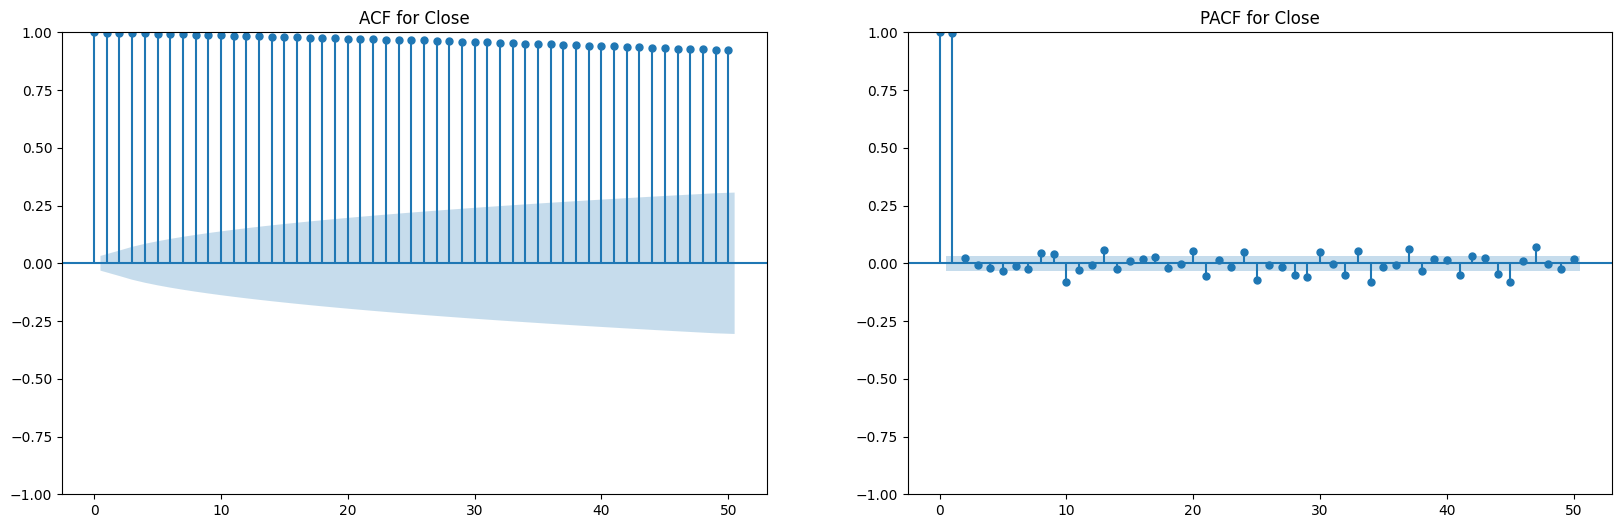

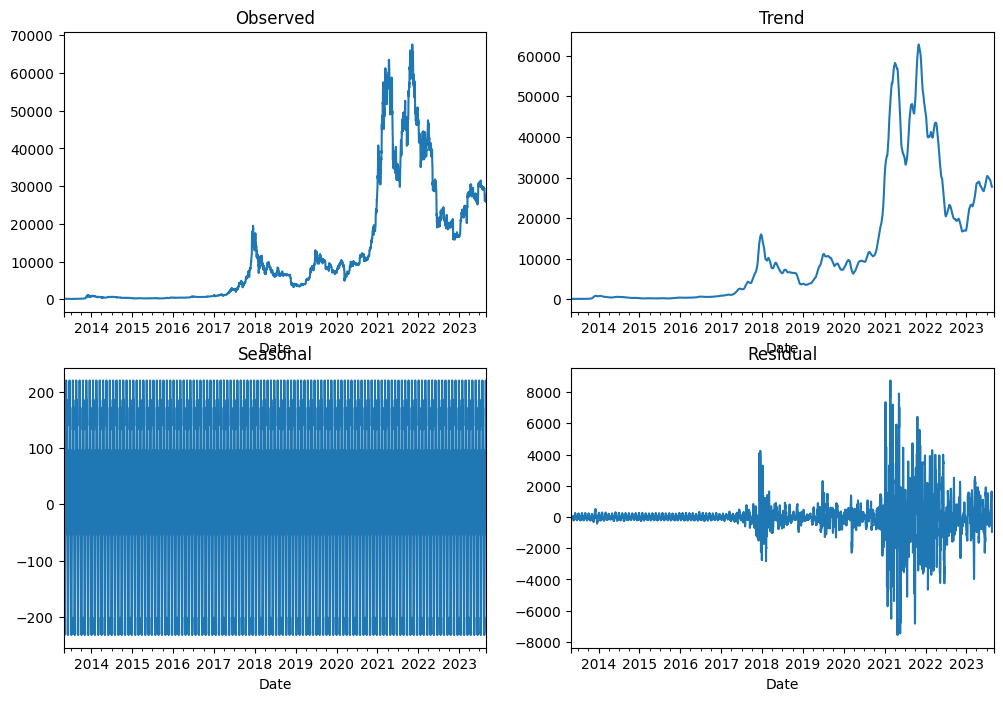

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -37786.4
Distribution:                  Normal   AIC:                           75580.9
Method:            Maximum Likelihood   BIC:                           75605.8
                                        No. Observations:                 3779
Date:                Sat, Sep 02 2023   Df Residuals:                     3778
Time:                        18:37:59   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           995.5989     32.709     30.439 1.700e-203 [9.

In [13]:
# Instantiate and call methods
tsa = TimeSeriesAnalysis(data, target='Close')
tsa.check_stationarity()
tsa.check_autocorrelation()
tsa.decompose_time_series()
tsa.check_volatility()


In [14]:
tsa.check_volatility()


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -37786.4
Distribution:                  Normal   AIC:                           75580.9
Method:            Maximum Likelihood   BIC:                           75605.8
                                        No. Observations:                 3779
Date:                Sat, Sep 02 2023   Df Residuals:                     3778
Time:                        18:38:00   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           995.5989     32.709     30.439 1.700e-203 [9.

In [15]:
granger_results = tsa.test_granger_causality('Open', maxlag=30, verbose=False)
display(HTML(tsa.concise_granger_output_table(granger_results)))

"Lag: 1ssr_ftest: F=2.1422, p=0.1434ssr_chi2test: chi2=2.1439, p=0.1431lrtest: chi2=2.1433, p=0.1432params_ftest: F=2.1422, p=0.1434","Lag: 2ssr_ftest: F=0.1910, p=0.8262ssr_chi2test: chi2=0.3824, p=0.8259lrtest: chi2=0.3824, p=0.8260params_ftest: F=0.1910, p=0.8262","Lag: 3ssr_ftest: F=0.8770, p=0.4522ssr_chi2test: chi2=2.6360, p=0.4512lrtest: chi2=2.6351, p=0.4514params_ftest: F=0.8770, p=0.4522","Lag: 4ssr_ftest: F=1.6755, p=0.1527ssr_chi2test: chi2=6.7180, p=0.1516lrtest: chi2=6.7120, p=0.1519params_ftest: F=1.6755, p=0.1527","Lag: 5ssr_ftest: F=0.7981, p=0.5509ssr_chi2test: chi2=4.0021, p=0.5491lrtest: chi2=4.0000, p=0.5494params_ftest: F=0.7981, p=0.5509","Lag: 6ssr_ftest: F=1.0820, p=0.3706ssr_chi2test: chi2=6.5144, p=0.3681lrtest: chi2=6.5088, p=0.3687params_ftest: F=1.0820, p=0.3706"
"Lag: 7ssr_ftest: F=2.2322, p=0.0290ssr_chi2test: chi2=15.6878, p=0.0281lrtest: chi2=15.6552, p=0.0285params_ftest: F=2.2322, p=0.0290","Lag: 8ssr_ftest: F=1.6811, p=0.0977ssr_chi2test: chi2=13.5095, p=0.0955lrtest: chi2=13.4854, p=0.0962params_ftest: F=1.6811, p=0.0977","Lag: 9ssr_ftest: F=4.9076, p=0.0000ssr_chi2test: chi2=44.3919, p=0.0000lrtest: chi2=44.1326, p=0.0000params_ftest: F=4.9076, p=0.0000","Lag: 10ssr_ftest: F=2.2624, p=0.0124ssr_chi2test: chi2=22.7511, p=0.0117lrtest: chi2=22.6827, p=0.0120params_ftest: F=2.2624, p=0.0124","Lag: 11ssr_ftest: F=2.2639, p=0.0096ssr_chi2test: chi2=25.0560, p=0.0089lrtest: chi2=24.9730, p=0.0092params_ftest: F=2.2639, p=0.0096","Lag: 12ssr_ftest: F=3.7747, p=0.0000ssr_chi2test: chi2=45.5988, p=0.0000lrtest: chi2=45.3251, p=0.0000params_ftest: F=3.7747, p=0.0000"
"Lag: 13ssr_ftest: F=2.8821, p=0.0004ssr_chi2test: chi2=37.7376, p=0.0003lrtest: chi2=37.5498, p=0.0003params_ftest: F=2.8821, p=0.0004","Lag: 14ssr_ftest: F=4.6153, p=0.0000ssr_chi2test: chi2=65.1156, p=0.0000lrtest: chi2=64.5589, p=0.0000params_ftest: F=4.6153, p=0.0000","Lag: 15ssr_ftest: F=4.6239, p=0.0000ssr_chi2test: chi2=69.9341, p=0.0000lrtest: chi2=69.2923, p=0.0000params_ftest: F=4.6239, p=0.0000","Lag: 16ssr_ftest: F=4.7816, p=0.0000ssr_chi2test: chi2=77.1828, p=0.0000lrtest: chi2=76.4019, p=0.0000params_ftest: F=4.7816, p=0.0000","Lag: 17ssr_ftest: F=4.4467, p=0.0000ssr_chi2test: chi2=76.3031, p=0.0000lrtest: chi2=75.5396, p=0.0000params_ftest: F=4.4467, p=0.0000","Lag: 18ssr_ftest: F=4.1530, p=0.0000ssr_chi2test: chi2=75.4959, p=0.0000lrtest: chi2=74.7481, p=0.0000params_ftest: F=4.1530, p=0.0000"
"Lag: 19ssr_ftest: F=4.6238, p=0.0000ssr_chi2test: chi2=88.7730, p=0.0000lrtest: chi2=87.7413, p=0.0000params_ftest: F=4.6238, p=0.0000","Lag: 20ssr_ftest: F=4.4104, p=0.0000ssr_chi2test: chi2=89.1803, p=0.0000lrtest: chi2=88.1389, p=0.0000params_ftest: F=4.4104, p=0.0000","Lag: 21ssr_ftest: F=3.7247, p=0.0000ssr_chi2test: chi2=79.1233, p=0.0000lrtest: chi2=78.3019, p=0.0000params_ftest: F=3.7247, p=0.0000","Lag: 22ssr_ftest: F=3.7919, p=0.0000ssr_chi2test: chi2=84.4329, p=0.0000lrtest: chi2=83.4981, p=0.0000params_ftest: F=3.7919, p=0.0000","Lag: 23ssr_ftest: F=4.0943, p=0.0000ssr_chi2test: chi2=95.3628, p=0.0000lrtest: chi2=94.1723, p=0.0000params_ftest: F=4.0943, p=0.0000","Lag: 24ssr_ftest: F=4.2800, p=0.0000ssr_chi2test: chi2=104.0780, p=0.0000lrtest: chi2=102.6617, p=0.0000params_ftest: F=4.2800, p=0.0000"
"Lag: 25ssr_ftest: F=3.3710, p=0.0000ssr_chi2test: chi2=85.4365, p=0.0000lrtest: chi2=84.4788, p=0.0000params_ftest: F=3.3710, p=0.0000","Lag: 26ssr_ftest: F=3.4003, p=0.0000ssr_chi2test: chi2=89.6737, p=0.0000lrtest: chi2=88.6192, p=0.0000params_ftest: F=3.4003, p=0.0000","Lag: 27ssr_ftest: F=3.7092, p=0.0000ssr_chi2test: chi2=101.6397, p=0.0000lrtest: chi2=100.2874, p=0.0000params_ftest: F=3.7092, p=0.0000","Lag: 28ssr_ftest: F=3.8058, p=0.0000ssr_chi2test: chi2=108.2081, p=0.0000lrtest: chi2=106.6767, p=0.0000params_ftest: F=3.8058, p=0.0000","Lag: 29ssr_ftest: F=4.0953, p=0.0000ssr_chi2test: chi2=120.6631, p=0.0000lrtest: chi2=118.7625, p=0.0000params_ftest: F=4.0953, p=0.0000","Lag: 30ssr_ftest: F=3.8333, p=0.0000ssr

# Block 6 - Feature_Eng_Tech

In [16]:
class Feature_Eng_Tech:

    def __init__(self, df, target_column):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input data should be a pandas DataFrame.")
        if target_column not in df.columns:
            raise ValueError(f"Target column {target_column} not found in DataFrame.")

        self.df = df.copy()
        self.target_column = target_column
        self.data_eng = self.df.copy()

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)
        self.logger.info("Initialized Feature_Eng_Tech.")

    def reset_data(self):
        self.data_eng = self.df.copy()
        self.logger.info("Reset data to the original state.")

    def handle_missing_values(self, method='ffill'):
        if method not in ['ffill', 'bfill', 'interpolate', 'drop']:
            raise ValueError("Invalid method for handling missing values. Choose 'ffill', 'bfill', 'interpolate', or 'drop'.")
        if self.df.isnull().sum().sum() > 0:
            self.df.fillna(method=method, inplace=True)
        else:
            self.logger.info("No missing values detected.")

    def add_date_features(self, include_day_of_week=True):
        if not isinstance(self.df.index, pd.DatetimeIndex):
            self.df.index = pd.to_datetime(self.df.index)

        self.df['year'] = self.df.index.year
        self.df['month'] = self.df.index.month
        self.df['day'] = self.df.index.day
        if include_day_of_week:
            self.df['day_of_week'] = self.df.index.dayofweek
        self.logger.info("Date-related features added.")

    def add_lag_features(self, window=3):
        if window > len(self.data_eng):
            raise ValueError("The window parameter should be less than the length of the time series data.")
        for i in range(1, window + 1):
            self.data_eng[f"lag_{i}"] = self.data_eng[self.target_column].shift(i)
        self.logger.info(f'Added lag features with window size {window}')

    def add_rolling_features(self, window=3, min_periods=1):
        self.data_eng[f"rolling_mean_{window}"] = self.data_eng[self.target_column].rolling(window=window, min_periods=min_periods).mean()
        self.data_eng[f"rolling_std_{window}"] = self.data_eng[self.target_column].rolling(window=window, min_periods=min_periods).std()
        self.logger.info(f'Added rolling window features with window size {window}')

    def add_expanding_window_features(self, min_periods=1):
        self.data_eng['expanding_mean'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).mean()
        self.data_eng['expanding_min'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).min()
        self.data_eng['expanding_max'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).max()
        self.data_eng['expanding_sum'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).sum()
        self.logger.info('Added expanding window features')

    def add_seasonal_decomposition(self, period=12, model='additive'):
        result = seasonal_decompose(self.data_eng[self.target_column], period=period, model=model)
        self.data_eng['trend'] = result.trend
        self.data_eng['seasonal'] = result.seasonal
        self.data_eng['residual'] = result.resid
        self.logger.info(f'Added seasonal decomposition with period {period} and model {model}')

    def detrend_data(self):
        self.data_eng['detrended'] = detrend(self.data_eng[self.target_column])
        self.logger.info('Detrended the data')

    def add_holiday_features(self):
        cal = USFederalHolidayCalendar()
        holidays = cal.holidays(start=self.data_eng.index.min(), end=self.data_eng.index.max())
        self.data_eng['is_holiday'] = self.data_eng.index.isin(holidays).astype(int)
        self.logger.info('Added holiday features')

    def add_fourier_features(self, period, order):
        for i in range(1, order + 1):
            self.data_eng[f'fourier_sin_{i}'] = np.sin(2 * i * np.pi * self.data_eng.index.dayofyear / period)
            self.data_eng[f'fourier_cos_{i}'] = np.cos(2 * i * np.pi * self.data_eng.index.dayofyear / period)
        self.logger.info(f'Added Fourier features with period {period} and order {order}')

    def handle_nan_values_post_engineering(self, method='drop'):
        if method == 'drop':
            self.data_eng.dropna(inplace=True)
        elif method == 'ffill':
            self.data_eng.fillna(method='ffill', inplace=True)
        elif method == 'bfill':
            self.data_eng.fillna(method='bfill', inplace=True)
        else:
            raise ValueError("Invalid method. Choose 'drop', 'ffill', or 'bfill'.")
        self.logger.info(f"Handled NaN values using {method} method.")

    def feature_engineering(self, config):
        """
        Apply feature engineering steps based on a configuration object.
        :param config: A dictionary with the configuration for feature engineering
        """
        feature_methods = {
            "handle_missing_values": self.handle_missing_values,
            "add_date_features": self.add_date_features,
            "add_lag_features": self.add_lag_features,
            "add_rolling_features": self.add_rolling_features,
            "add_expanding_window_features": self.add_expanding_window_features,
            "add_seasonal_decomposition": self.add_seasonal_decomposition,
            "detrend_data": self.detrend_data,
            "add_holiday_features": self.add_holiday_features,
            "add_fourier_features": lambda: self.add_fourier_features(config.get("fourier_period", 365), config.get("fourier_order", 3))
        }

        for feature, method in feature_methods.items():
            if config.get(feature):
                method()
        self.handle_nan_values_post_engineering()
        self.logger.info('Feature engineering steps applied based on configuration.')


    def get_engineered_data(self):
        return self.data_eng.copy()



In [17]:
feature_eng = Feature_Eng_Tech(data, target_column='Close')

# Define a configuration for feature engineering
config = {
    "handle_missing_values": True,
    "add_date_features": True,
    "add_lag_features": True,
    "add_rolling_features": True,
    "add_expanding_window_features": True,
    "add_seasonal_decomposition": True,
    "detrend_data": True,
    "add_holiday_features": True,
    "add_fourier_features": True,
}

# Apply feature engineering based on the configuration
feature_eng.feature_engineering(config)

# Get the engineered data
data_eng = feature_eng.get_engineered_data()
data_eng

,Open,High,Low,Close,Volume,Market Cap,lag_1,lag_2,lag_3,rolling_mean_3,...,seasonal,residual,detrended,is_holiday,fourier_sin_1,fourier_cos_1,fourier_sin_2,fourier_cos_2,fourier_sin_3,fourier_cos_3
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-04,98.100,115.000,92.500,112.500,0.000,1250316562.500,97.750,105.210,116.990,105.153,...,32.424,-36.967,8259.879,0,0.845,-0.534,-0.903,-0.429,0.120,0.993
2013-05-05,112.900,118.800,107.140,115.910,0.000,1288693175.500,112.500,97.750,105.210,108.720,...,-46.205,46.741,8252.555,0,0.836,-0.549,-0.918,-0.398,0.171,0.985
2013-05-06,115.980,124.660,106.640,112.300,0.000,1249023060.000,115.910,112.500,97.750,113.570,...,15.191,-16.045,8238.210,0,0.826,-0.563,-0.931,-0.366,0.222,0.975
2013-05-07,112.250,113.440,97.700,111.500,0.000,1240593600.000,112.300,115.910,112.500,113.237,...,-17.391,16.697,8226.676,0,0.817,-0.577,-0.943,-0.333,0.272,0.962
2013-05-08,109.600,115.780,109.600,113.570,0.000,1264049202.150,111.500,112.300,115.910,112.457,...,-26.109,27.181,8218.011,0,0.806,-0.591,-0.954,-0.301,0.321,0.947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-22,26130.750,26135.510,25520.730,26031.660,14503820706.420,506709265107.930,26124.140,26189.580,26096.200,26115.127,...,2.213,-245.510,-6203.774,0,-0.775,-0.632,0.980,-0.201,-0.464,0.886
2023-08-23,26040.470,26786.900,25805.000,26431.640,16985265785.290,514519784075.080,26031.660,26124.140,26189.580,26195.813,...,2.346,218.203,-5814.529,0,-0.786,-0.619,0.972,-0.234,-0.417,0.909
2023-08-24,26431.520,26554.910,25914.930,26162.370,12871532023.010,509301597240.580,26431.640,26031.660,26124.140,26208.557,...,-8.075,-136.918,-6094.533,0,-0.796,-0.605,0.963,-0.268,-0.370,0.929


# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 6 - Unified Time Series

In [4]:
class DataPreprocessor:

    def __init__(self, df, target_column, logger=None):
        self.data = df.copy()
        self.target_column = target_column
        self.scalers = {}
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.logger = logger if logger else logging.getLogger(__name__)
        self.logger.info("Initializing DataPreprocessor...")
        self.split_data()

    def split_data(self, test_size=0.2, split_date=None):
        """
        Split the data into training and test sets.
        :param test_size: float, optional, default 0.2. Represents the proportion of the dataset to include in the test split.
        :param split_date: str, optional, default None. A date string (e.g., '2023-01-01') to split data at a specific date. If provided, this will override test_size.
        """
        self.logger.info("Splitting data...")

        features = self.data.drop(columns=[self.target_column])
        target = self.data[self.target_column]

        if split_date:
            train_mask = self.data.index < split_date
            self.X_train, self.X_test = features[train_mask], features[~train_mask]
            self.y_train, self.y_test = target[train_mask], target[~train_mask]
        else:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                features, target, test_size=test_size, shuffle=False
            )
        self.logger.info(f"Data split completed. X_train shape: {self.X_train.shape}, y_train shape: {self.y_train.shape}")

    def get_scaler(self, scaler_type):
        self.logger.info(f"Getting scaler of type: {scaler_type}")
        scalers = {
            "MinMax": MinMaxScaler(),
            "Standard": StandardScaler(),
            "Robust": RobustScaler(),
            "Quantile": QuantileTransformer(output_distribution='normal'),
            "Power": PowerTransformer(method='yeo-johnson')
        }

        try:
            return scalers[scaler_type]
        except KeyError:
            raise ValueError(f"Invalid scaler_type. Supported types are: {', '.join(scalers.keys())}")

    def normalize_data(self, scaler_type='MinMax'):
        self.logger.info("Normalizing feature data...")
        scaler = self.get_scaler(scaler_type)
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)
        self.scalers['features'] = scaler
        self.logger.info("Feature data normalization completed.")

    def normalize_target(self, scaler_type='MinMax'):
        self.logger.info("Normalizing target data...")
        scaler = self.get_scaler(scaler_type)
        self.y_train = scaler.fit_transform(self.y_train.values.reshape(-1, 1))
        self.y_test = scaler.transform(self.y_test.values.reshape(-1, 1))
        self.scalers['target'] = scaler
        self.logger.info("Target data normalization completed.")

    def reshape_for_recurrent(self, data):
        self.logger.info("Reshaping data for recurrent models...")
        reshaped_data = data.reshape((data.shape[0], data.shape[1], data.shape[2]))
        self.logger.info(f"Data reshaped to {reshaped_data.shape}.")
        return reshaped_data

    def generate_sequences(self, X_data, y_data, n_steps):
        X, y = [], []
        for i in range(len(X_data) - n_steps):
            seq_x = X_data[i:i + n_steps, :]
            seq_y = y_data[i + n_steps - 1]
            X.append(seq_x)
            y.append(seq_y)
        self.logger.info(f"Generated {len(X)} sequences of shape {X[0].shape}.")
        return np.array(X), np.array(y)

    def prepare_data_for_recurrent(self, n_steps):
        self.logger.info(f"Preparing data for recurrent models with {n_steps} timesteps...")
        X_train_seq, y_train_seq = self.generate_sequences(self.X_train, self.y_train, n_steps)
        X_test_seq, y_test_seq = self.generate_sequences(self.X_test, self.y_test, n_steps)
        X_train_seq = self.reshape_for_recurrent(X_train_seq)
        X_test_seq = self.reshape_for_recurrent(X_test_seq)
        self.logger.info("Data preparation for recurrent models completed.")
        return X_train_seq, y_train_seq, X_test_seq, y_test_seq

    def prepare_for_prophet(self):
        prophet_data = self.data[[self.target_column]].reset_index()
        prophet_data.columns = ['ds', 'y']
        return prophet_data

    def get_preprocessed_data(self):
        return self.X_train, self.y_train, self.X_test, self.y_test


In [5]:
# Initialize the DataPreprocessor
preprocessor = DataPreprocessor(data, 'Close')

# --- For Linear Regression, XGBoost, and LightGBM ---
# Normalize the data (using MinMaxScaler as an example)
preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

# Retrieve the preprocessed data
X_train, y_train, X_test, y_test = preprocessor.get_preprocessed_data()

# Print the shapes
print("Linear Regression, XGBoost, and LightGBM Data Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("----")

# --- For Prophet ---
prophet_data = preprocessor.prepare_for_prophet()

# Print the shape
print("Prophet Data Shape:", prophet_data.shape)
print("----")

# --- For LSTM ---
# Define the sequence length and prepare data in sequences
n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")


2023-09-02 21:05:10,872 [INFO] - Initializing DataPreprocessor...
2023-09-02 21:05:10,873 [INFO] - Splitting data...
2023-09-02 21:05:10,880 [INFO] - Data split completed. X_train shape: (3023, 5), y_train shape: (3023,)
2023-09-02 21:05:10,880 [INFO] - Normalizing feature data...
2023-09-02 21:05:10,881 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:10,893 [INFO] - Feature data normalization completed.
2023-09-02 21:05:10,895 [INFO] - Normalizing target data...
2023-09-02 21:05:10,896 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:10,897 [INFO] - Target data normalization completed.
2023-09-02 21:05:10,901 [INFO] - Preparing data for recurrent models with 3 timesteps...
2023-09-02 21:05:10,905 [INFO] - Generated 3020 sequences of shape (3, 5).
2023-09-02 21:05:10,912 [INFO] - Generated 753 sequences of shape (3, 5).
2023-09-02 21:05:10,915 [INFO] - Reshaping data for recurrent models...
2023-09-02 21:05:10,915 [INFO] - Data reshaped to (3020, 3, 5).
2023-09-02 21:0

Linear Regression, XGBoost, and LightGBM Data Shapes:
X_train: (3023, 5)
y_train: (3023, 1)
X_test: (756, 5)
y_test: (756, 1)
----
Prophet Data Shape: (3779, 2)
----
LSTM Data Shapes:
X_train_seq: (3020, 3, 5)
y_train_seq: (3020, 1)
X_test_seq: (753, 3, 5)
y_test_seq: (753, 1)
----


In [6]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

# Get preprocessed data and scalers
X_train, y_train, X_test, y_test = preprocessor.get_preprocessed_data()
feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

2023-09-02 21:05:10,940 [INFO] - Initializing DataPreprocessor...
2023-09-02 21:05:10,940 [INFO] - Splitting data...
2023-09-02 21:05:10,946 [INFO] - Data split completed. X_train shape: (3023, 5), y_train shape: (3023,)
2023-09-02 21:05:10,947 [INFO] - Normalizing feature data...
2023-09-02 21:05:10,947 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:10,955 [INFO] - Feature data normalization completed.
2023-09-02 21:05:10,956 [INFO] - Normalizing target data...
2023-09-02 21:05:10,957 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:10,959 [INFO] - Target data normalization completed.


In [7]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

2023-09-02 21:05:11,823 [INFO] - Initializing DataPreprocessor...
2023-09-02 21:05:11,824 [INFO] - Splitting data...
2023-09-02 21:05:11,827 [INFO] - Data split completed. X_train shape: (3023, 5), y_train shape: (3023,)
2023-09-02 21:05:11,828 [INFO] - Normalizing feature data...
2023-09-02 21:05:11,829 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:11,832 [INFO] - Feature data normalization completed.
2023-09-02 21:05:11,833 [INFO] - Normalizing target data...
2023-09-02 21:05:11,834 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:11,835 [INFO] - Target data normalization completed.
2023-09-02 21:05:11,835 [INFO] - Preparing data for recurrent models with 3 timesteps...
2023-09-02 21:05:11,838 [INFO] - Generated 3020 sequences of shape (3, 5).
2023-09-02 21:05:11,843 [INFO] - Generated 753 sequences of shape (3, 5).
2023-09-02 21:05:11,845 [INFO] - Reshaping data for recurrent models...
2023-09-02 21:05:11,845 [INFO] - Data reshaped to (3020, 3, 5).
2023-09-02 21:0

LSTM Data Shapes:
X_train_seq: (3020, 3, 5)
y_train_seq: (3020, 1)
X_test_seq: (753, 3, 5)
y_test_seq: (753, 1)
----


# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_Linear_Regression

In [22]:
class Enhanced_Linear_Regression:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        # Setting up logging
        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Choose the regression model based on config
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """
        Train the Linear Regression model.
        """
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """
        Make predictions using the trained Linear Regression model for both training and test data.
        """
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        """
        Inverse scale the predictions to original scale using the target_scaler.
        """
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """
        Evaluate the model using various metrics and return the results for both training and test datasets.
        """
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            self.logger.info("Model evaluated successfully.")
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        """
        Save the trained model to the specified folder with a naming convention.

        Args:
        - version (str): Version of the model.
        """
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LR_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


,Original,Predicted
Date,,
2021-08-07,44555.800,43864.030
2021-08-08,43798.120,44308.888
2021-08-09,46365.400,45088.685
2021-08-10,45585.030,45860.809
2021-08-11,45593.640,45918.727
...,...,...
2023-08-28,26106.150,26426.037
2023-08-29,27727.390,27443.626
2023-08-30,27297.270,27820.760


,Original,Predicted
Date,,
2013-04-28,127.950,195.450
2013-04-29,144.540,204.829
2013-04-30,139.000,205.645
2013-05-01,116.990,192.353
2013-05-02,105.210,178.303
...,...,...
2021-08-02,39201.950,39614.664
2021-08-03,38152.980,38748.879
2021-08-04,39747.510,39028.820


,RMSE,R2 Score,MAE,Explained Variance
Train,280.907,0.999,130.478,0.999
Test,569.632,0.998,432.839,0.998


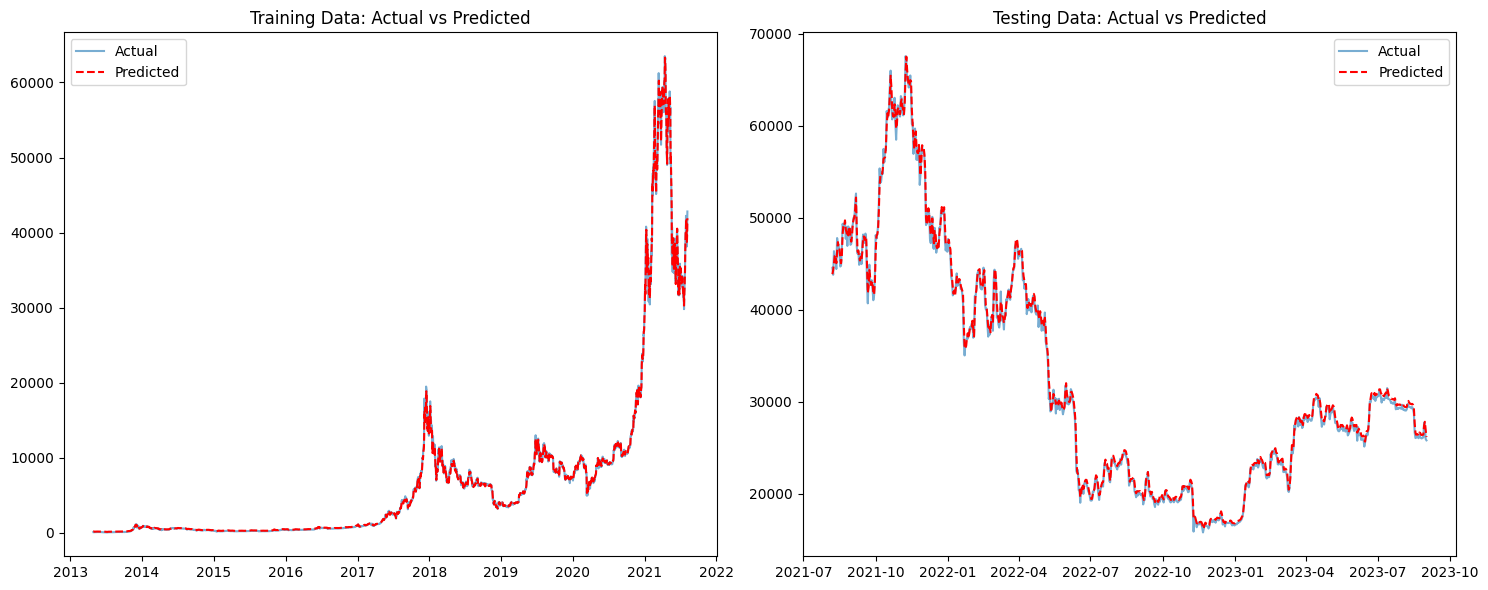

In [23]:
from IPython.display import display
config = {
    'regularization': 'ridge',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()
model.save_model_to_folder(version="final")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 8 - Enhanced_XGBoost

In [24]:
class Enhanced_XGBoost:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize XGBoost model with given or default parameters
        self.model = xgb.XGBRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("XGBoost model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()


    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"XGB_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")

[18:38:04] WARNING: ../src/learner.cc:767: 
Parameters: { "regularization" } are not used.



,Original,Predicted
Date,,
2021-08-07,44555.800,46241.977
2021-08-08,43798.120,41196.562
2021-08-09,46365.400,46241.977
2021-08-10,45585.030,46241.977
2021-08-11,45593.640,46241.977
...,...,...
2023-08-28,26106.150,27510.990
2023-08-29,27727.390,27510.990
2023-08-30,27297.270,29101.227


,Original,Predicted
Date,,
2013-04-28,127.950,329.852
2013-04-29,144.540,329.852
2013-04-30,139.000,329.852
2013-05-01,116.990,329.852
2013-05-02,105.210,329.852
...,...,...
2021-08-02,39201.950,39250.500
2021-08-03,38152.980,38114.176
2021-08-04,39747.510,39250.500


,RMSE,R2 Score,MAE,Explained Variance
Train,410.571,0.999,206.589,0.999
Test,1881.678,0.978,1267.035,0.978


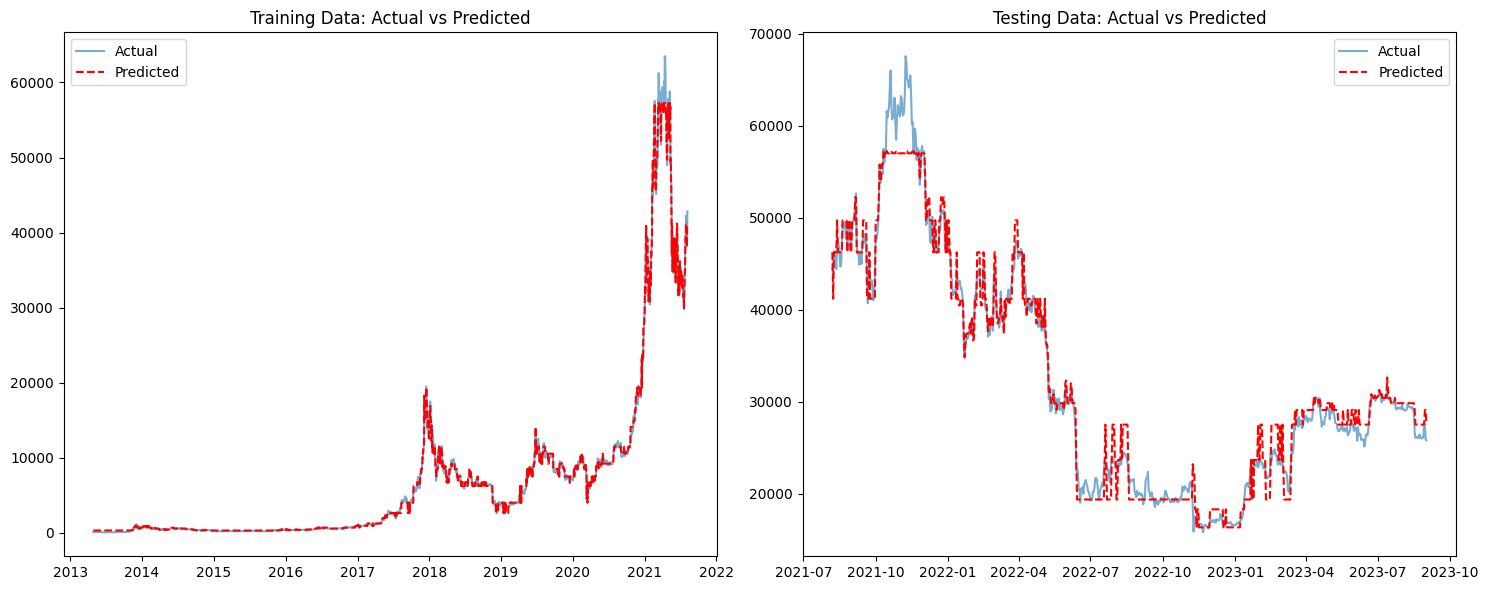

In [25]:
from IPython.display import display
xgb_config = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5
}

xgb_model = Enhanced_XGBoost(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
xgb_model.train_model()
xgb_model.make_predictions()
xgb_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = xgb_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = xgb_model.evaluate_model()
display(evaluation_results)
xgb_model.plot_predictions()
xgb_model.save_model_to_folder(version="final")


# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 9 - Enhanced_LightGBM

In [26]:
class Enhanced_LightGBM:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize LightGBM model with given or default parameters
        self.model = LGBMRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("LightGBM model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).ravel()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).ravel()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            results_df = pd.DataFrame(results, index=['Train', 'Test'])
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LGBM_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 3023, number of used features: 5
[LightGBM] [Info] Start training from score 0.109353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

,Original,Predicted
Date,,
2021-08-07,44555.800,41709.590
2021-08-08,43798.120,42122.470
2021-08-09,46365.400,45875.591
2021-08-10,45585.030,45846.414
2021-08-11,45593.640,45846.414
...,...,...
2023-08-28,26106.150,24539.065
2023-08-29,27727.390,24340.567
2023-08-30,27297.270,29699.049


,Original,Predicted
Date,,
2013-04-28,127.950,129.150
2013-04-29,144.540,153.994
2013-04-30,139.000,152.707
2013-05-01,116.990,120.891
2013-05-02,105.210,114.778
...,...,...
2021-08-02,39201.950,39259.848
2021-08-03,38152.980,38210.912
2021-08-04,39747.510,39405.525


,RMSE,R2 Score,MAE,Explained Variance
Train,188.930,1.000,70.372,1.000
Test,1373.453,0.988,982.100,0.988


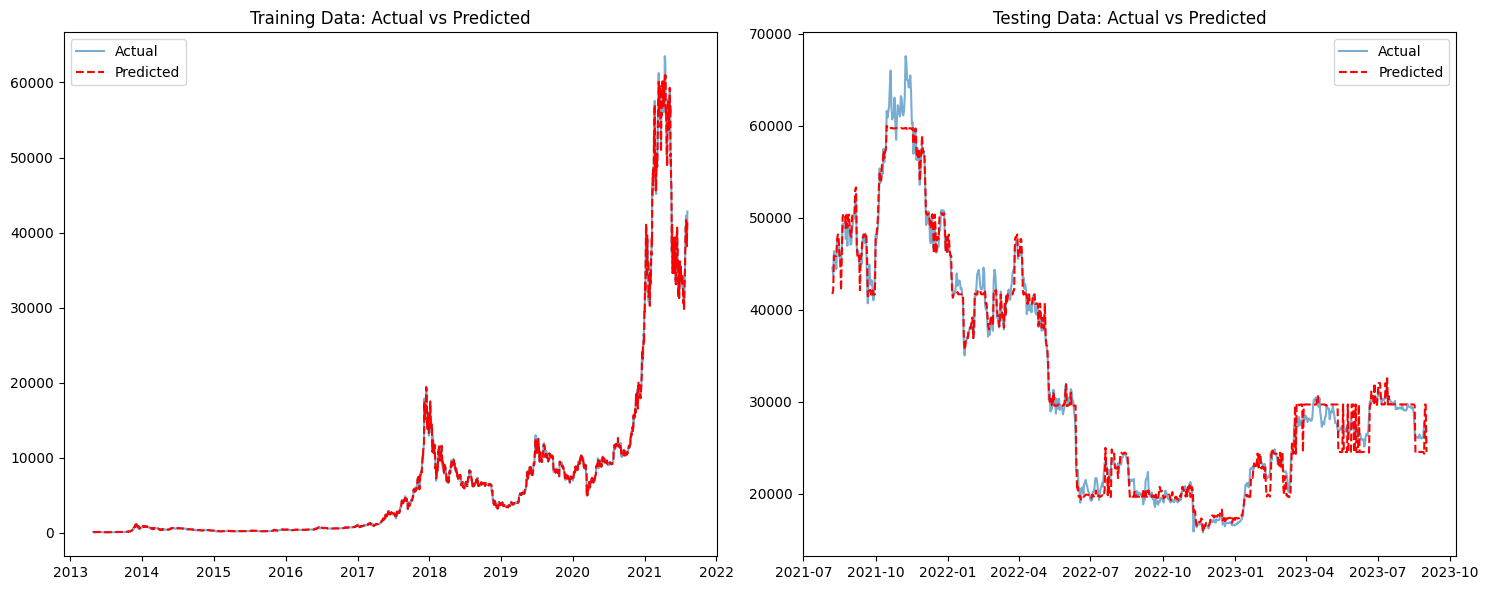

In [27]:
from IPython.display import display

lgbm_config = {
    'objective': 'regression',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5
}

lgbm_model = Enhanced_LightGBM(lgbm_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
lgbm_model.train_model()
lgbm_model.make_predictions()
lgbm_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = lgbm_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = lgbm_model.evaluate_model()
display(evaluation_results)
lgbm_model.plot_predictions()
lgbm_model.save_model_to_folder(version="final")


# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_SVM

In [28]:
class Enhanced_SVM:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_SVM model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize SVM model with given or default parameters
        self.model = SVR(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # ravel() is used to convert y_train to 1D for SVM
            self.logger.info("SVM model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"SVM_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


,Original,Predicted
Date,,
2021-08-07,44555.800,40101.895
2021-08-08,43798.120,40244.109
2021-08-09,46365.400,40927.247
2021-08-10,45585.030,41255.640
2021-08-11,45593.640,41313.212
...,...,...
2023-08-28,26106.150,30403.078
2023-08-29,27727.390,30827.277
2023-08-30,27297.270,31186.765


,Original,Predicted
Date,,
2013-04-28,127.950,6396.893
2013-04-29,144.540,6393.824
2013-04-30,139.000,6393.290
2013-05-01,116.990,6397.917
2013-05-02,105.210,6403.504
...,...,...
2021-08-02,39201.950,37309.988
2021-08-03,38152.980,36902.148
2021-08-04,39747.510,37060.703


,RMSE,R2 Score,MAE,Explained Variance
Train,4908.979,0.821,4719.794,0.966
Test,4663.379,0.865,4358.040,0.878


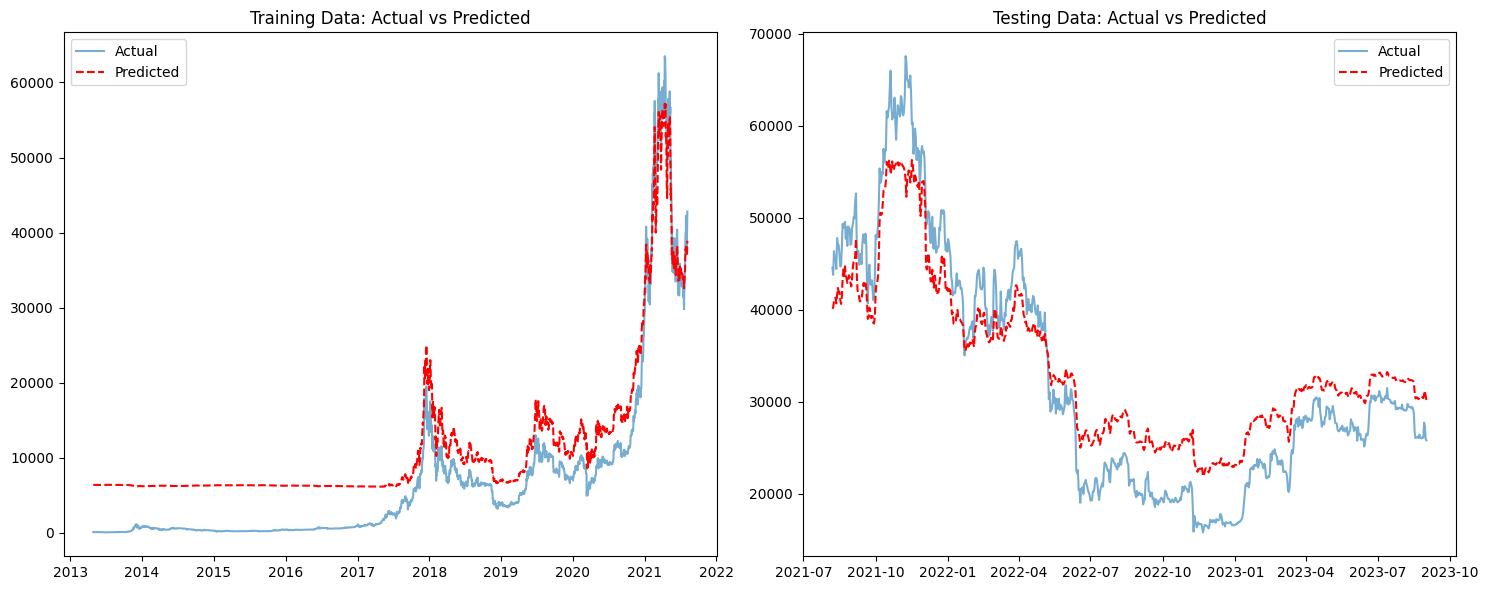

In [29]:
# Sample usage:
svm_config = {
    'kernel': 'rbf',
    'C': 1.0,
    'epsilon': 0.1
}

svm_model = Enhanced_SVM(svm_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
svm_model.train_model()
svm_model.make_predictions()
svm_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = svm_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = svm_model.evaluate_model()
display(evaluation_results)
svm_model.plot_predictions()
svm_model.save_model_to_folder(version="final")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_KNN

In [30]:
class Enhanced_KNN:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_KNN model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize KNN model with given or default parameters
        self.model = KNeighborsRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # ravel() is used to convert y_train to 1D for KNN
            self.logger.info("KNN model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"KNN_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


,Original,Predicted
Date,,
2021-08-07,44555.800,43735.664
2021-08-08,43798.120,43735.664
2021-08-09,46365.400,45336.672
2021-08-10,45585.030,47759.428
2021-08-11,45593.640,47759.428
...,...,...
2023-08-28,26106.150,25805.276
2023-08-29,27727.390,28332.814
2023-08-30,27297.270,28526.094


,Original,Predicted
Date,,
2013-04-28,127.950,121.620
2013-04-29,144.540,138.284
2013-04-30,139.000,139.650
2013-05-01,116.990,121.620
2013-05-02,105.210,110.946
...,...,...
2021-08-02,39201.950,39421.354
2021-08-03,38152.980,38872.942
2021-08-04,39747.510,39143.630


,RMSE,R2 Score,MAE,Explained Variance
Train,215.385,1.000,79.232,1.000
Test,1109.214,0.992,876.098,0.993


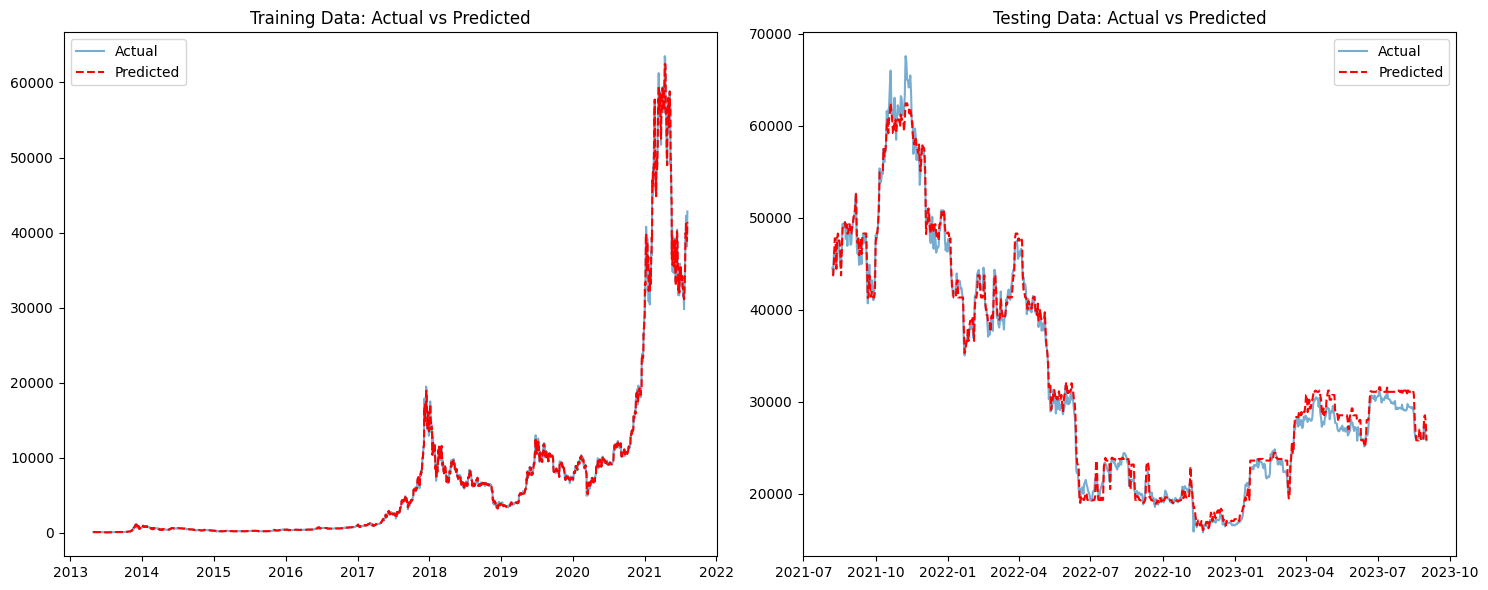

In [31]:
from IPython.display import display

# Configuration for KNN
knn_config = {
    'n_neighbors': 5,  # Number of neighbors to use
    'weights': 'uniform',  # Weight function used in prediction
    'algorithm': 'auto'  # Algorithm used to compute the nearest neighbors
}

# Instantiate the Enhanced_KNN model
knn_model = Enhanced_KNN(knn_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
knn_model.train_model()
knn_model.make_predictions()
knn_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = knn_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = knn_model.evaluate_model()
display(evaluation_results)
knn_model.plot_predictions()
knn_model.save_model_to_folder(version="final")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_RandomForest

In [32]:

class Enhanced_RandomForest:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_RandomForest model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize RandomForest model with given or default parameters
        self.model = RandomForestRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # Using ravel() to fit the expected shape
            self.logger.info("RandomForest model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"RF_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")



,Original,Predicted
Date,,
2021-08-07,44555.800,44205.257
2021-08-08,43798.120,43660.158
2021-08-09,46365.400,45753.894
2021-08-10,45585.030,45822.453
2021-08-11,45593.640,45870.225
...,...,...
2023-08-28,26106.150,26854.942
2023-08-29,27727.390,27530.562
2023-08-30,27297.270,28360.786


,Original,Predicted
Date,,
2013-04-28,127.950,126.835
2013-04-29,144.540,141.946
2013-04-30,139.000,137.475
2013-05-01,116.990,117.142
2013-05-02,105.210,105.962
...,...,...
2021-08-02,39201.950,39315.720
2021-08-03,38152.980,38236.105
2021-08-04,39747.510,39939.448


,RMSE,R2 Score,MAE,Explained Variance
Train,52.622,1.000,20.716,1.000
Test,671.150,0.997,531.997,0.998


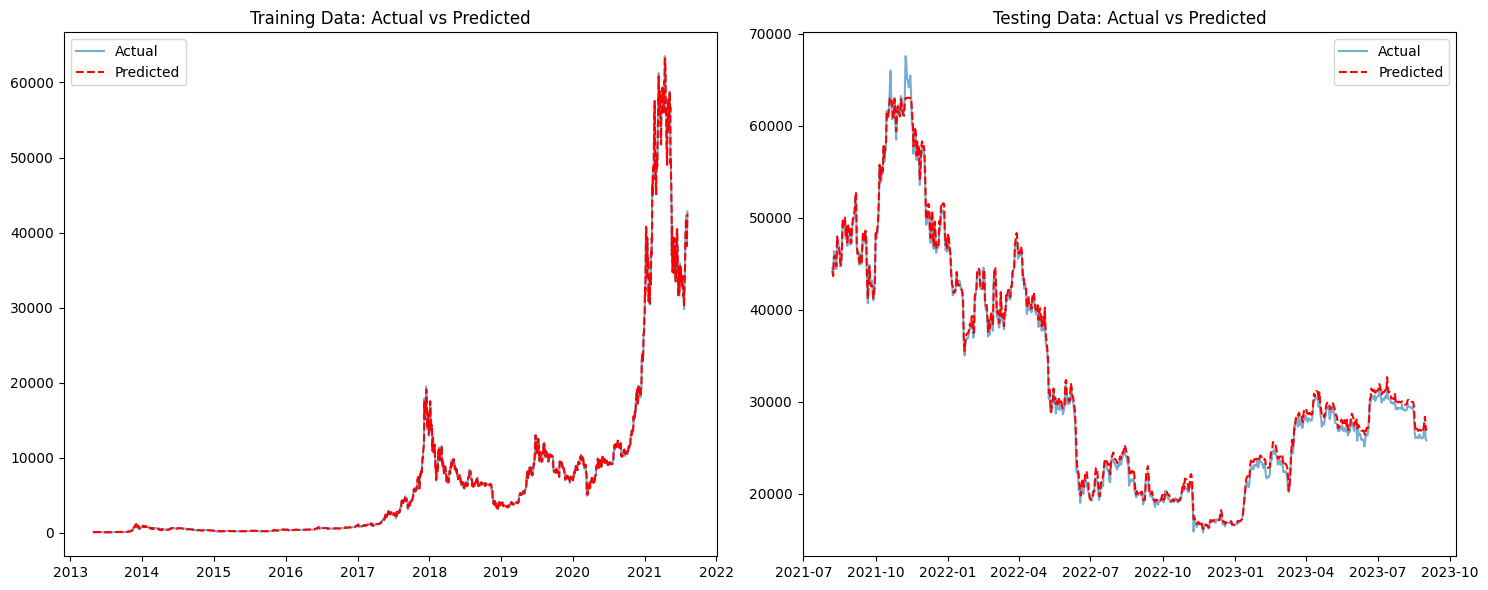

In [33]:
from IPython.display import display

# Configuration for RandomForest
rf_config = {
    'n_estimators': 100,  # Number of trees in the forest
    'criterion': 'poisson',  # Function to measure the quality of a split
    'max_depth': None  # The maximum depth of the tree
}

# Instantiate the Enhanced_RandomForest model
rf_model = Enhanced_RandomForest(rf_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
rf_model.train_model()
rf_model.make_predictions()
rf_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = rf_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = rf_model.evaluate_model()
display(evaluation_results)
rf_model.plot_predictions()
rf_model.save_model_to_folder(version="final")

In [34]:
stop

NameError: ignored

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block X - LSTM Class

In [35]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

LSTM Data Shapes:
X_train_seq: (3020, 3, 5)
y_train_seq: (3020, 1)
X_test_seq: (753, 3, 5)
y_test_seq: (753, 1)
----


In [36]:
class LSTM_Models:
    def __init__(self, input_shape, units, dropout, dense_units, optimizer, feature_scaler, target_scaler,
                 X_train, y_train, X_test, y_test, data, cross_val=False):
        logging.info("Initializing LSTM model")

        self.model = Sequential()
        for i, unit in enumerate(units):
            return_sequences = True if i < len(units) - 1 else False
            self.model.add(LSTM(units=unit, input_shape=input_shape, return_sequences=return_sequences))
            self.model.add(Dropout(dropout))
        self.model.add(Dense(units=dense_units))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        self.params = {
            'input_shape': input_shape,
            'units': units,
            'dropout': dropout,
            'dense_units': dense_units,
            'optimizer': optimizer
        }

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info("Training LSTM model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions with LSTM model")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                 'Predicted': self.train_predictions.squeeze()})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                'Predicted': self.test_predictions.squeeze()})
        logging.info("Predictions made")

    def evaluate_model(self):
        logging.info("Evaluating LSTM model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"LSTM_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [37]:
# After preparing your data with the DataPreprocessing class...
lstm_model = LSTM_Models(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                         units=[256, 128, 64],
                         dropout=0.2,
                         dense_units=1,
                         optimizer='adam',
                         feature_scaler=feature_scaler,
                         target_scaler=target_scaler,
                         X_train=X_train_seq,
                         y_train=y_train_seq,
                         X_test=X_test_seq,
                         y_test=y_test_seq,
                         data=preprocessor.data,
                         cross_val=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 256)            268288    
                                                                 
 dropout (Dropout)           (None, 3, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 128)            197120    
                                                                 
 dropout_1 (Dropout)         (None, 3, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

Epoch 1/100
76/76 [==============================] - 10s 45ms/step - loss: 0.0014 - val_loss: 0.1173
Epoch 2/100
76/76 [==============================] - 2s 28ms/step - loss: 0.0033 - val_loss: 0.1174
Epoch 3/100
76/76 [==============================] - 2s 28ms/step - loss: 0.0018 - val_loss: 0.0581
Epoch 4/100
76/76 [==============================] - 3s 42ms/step - loss: 5.6071e-04 - val_loss: 0.0039
Epoch 5/100
76/76 [==============================] - 2s 31ms/step - loss: 5.1309e-04 - val_loss: 0.0559
Epoch 6/100
76/76 [==============================] - 2s 28ms/step - loss: 6.7944e-04 - val_loss: 0.0039
Epoch 7/100
76/76 [==============================] - 2s 27ms/step - loss: 1.0434e-04 - val_loss: 0.0018
Epoch 8/100
76/76 [==============================] - 2s 27ms/step - loss: 1.3585e-04 - val_loss: 0.0011
Epoch 9/100
76/76 [==============================] - 2s 29ms/step - loss: 9.7712e-05 - val_loss: 7.8881e-04
Epoch 10/100
76/76 [==============================] - 3s 43ms/step - lo

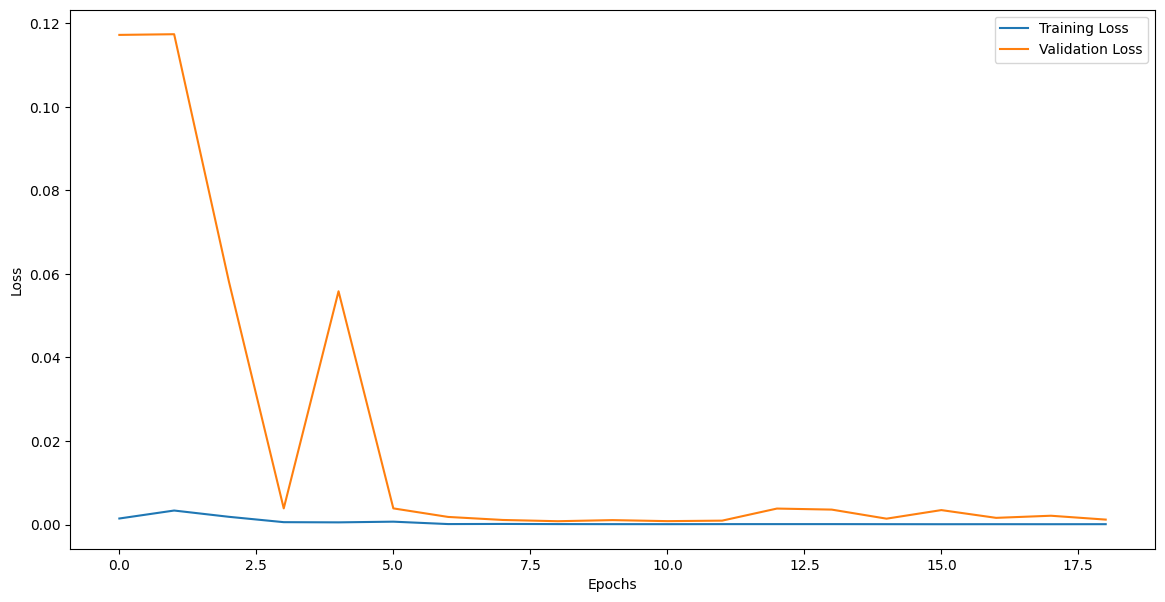

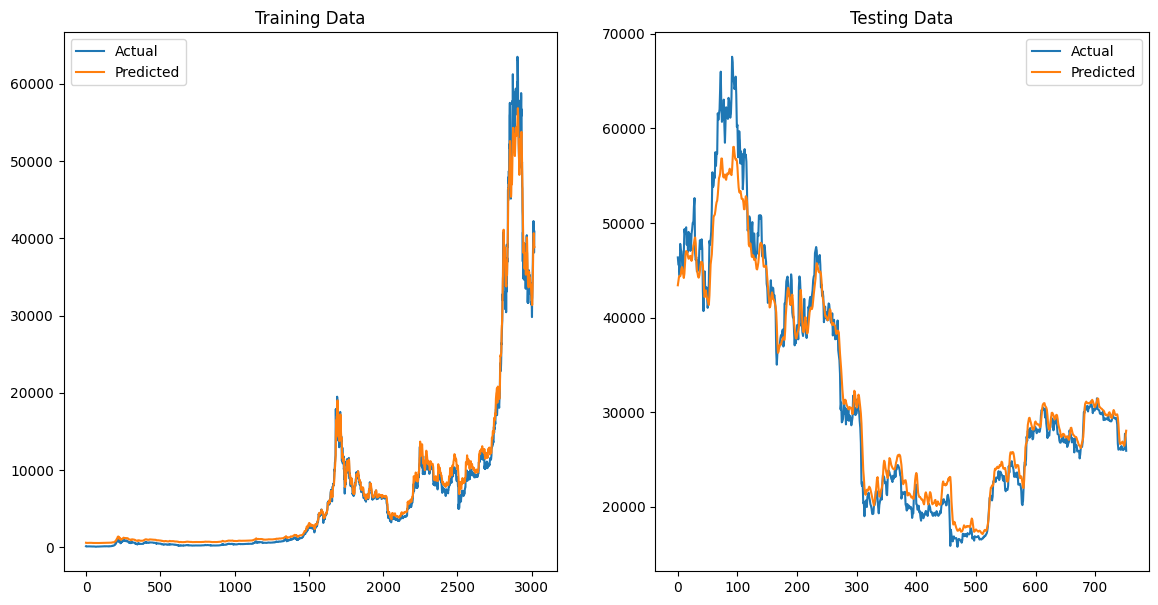

In [38]:
lstm_model.train_model(epochs=100, batch_size=32, early_stopping=True)
lstm_model.save_model()  # save the model
lstm_model.make_predictions()
lstm_model.evaluate_model()
lstm_model.plot_history()
lstm_model.plot_predictions()

In [39]:
# After preparing your data with the DataPreprocessing class...
lstm_model1 = LSTM_Models(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                         units=[256],
                         dropout=0.2,
                         dense_units=1,
                         optimizer='adam',
                         feature_scaler=feature_scaler,  # Updated from scaler=preprocessor.scaler
                         target_scaler=target_scaler,    # Newly added
                         X_train=X_train_seq,
                         y_train=y_train_seq,
                         X_test=X_test_seq,
                         y_test=y_test_seq,
                         data=preprocessor.data,         # Newly added
                         cross_val=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               268288    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 268,545
Trainable params: 268,545
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
76/76 [==============================] - 4s 20ms/step - loss: 3.9171e-04 - val_loss: 0.0094
Epoch 2/100
76/76 [==============================] - 1s 14ms/step - loss: 6.6557e-04 - val_loss: 0.0011
Epoch 3/100
76/76 [==============================] - 1s 14ms/step - loss: 9.0753e-05 - val_loss: 0.0014
Epoch 4/100
76/76 [==============================] - 1s 14ms/step - loss: 1.5429e-04 - val_loss: 4.5023e-04
Epoch 5/100
76/76 [==============================] - 1s 14ms/step - loss: 9.2356e-05 - val_loss: 0.0021
Epoch 6/100
76/76 [==============================] - 1s 14ms/step - loss: 1.5415e-04 - val_loss: 5.1410e-04
Epoch 7/100
76/76 [==============================] - 1s 13ms/step - loss: 1.0645e-04 - val_loss: 0.0035
Epoch 8/100
76/76 [==============================] - 1s 13ms/step - loss: 1.7454e-04 - val_loss: 6.2821e-04
Epoch 9/100
76/76 [==============================] - 1s 19ms/step - loss: 1.0010e-04 - val_loss: 0.0028
Epoch 10/100
76/76 [==============================] 

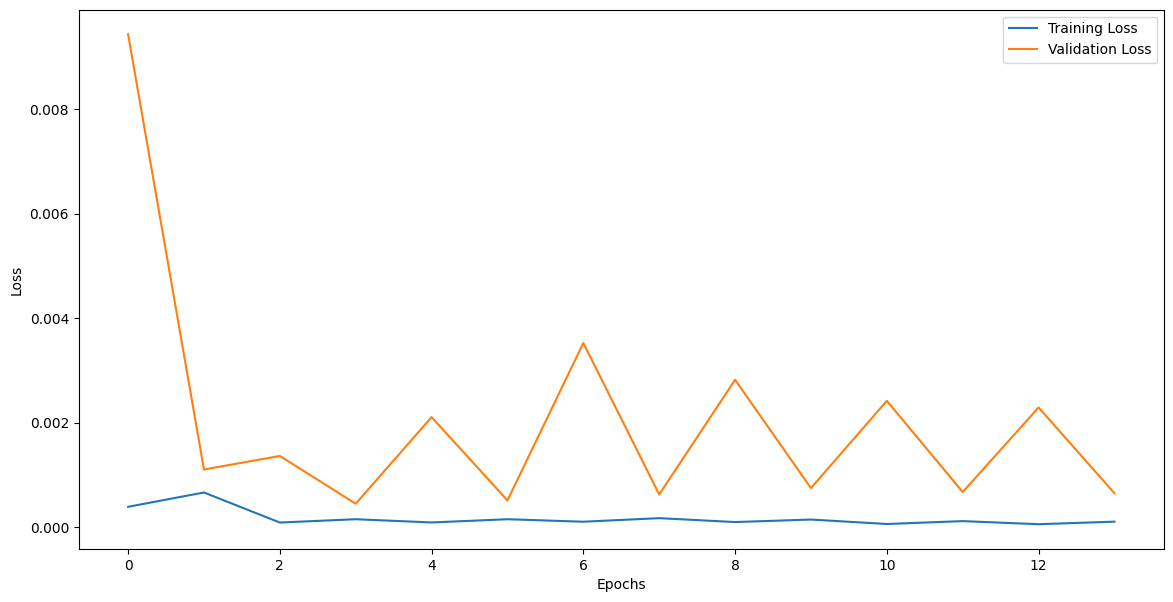

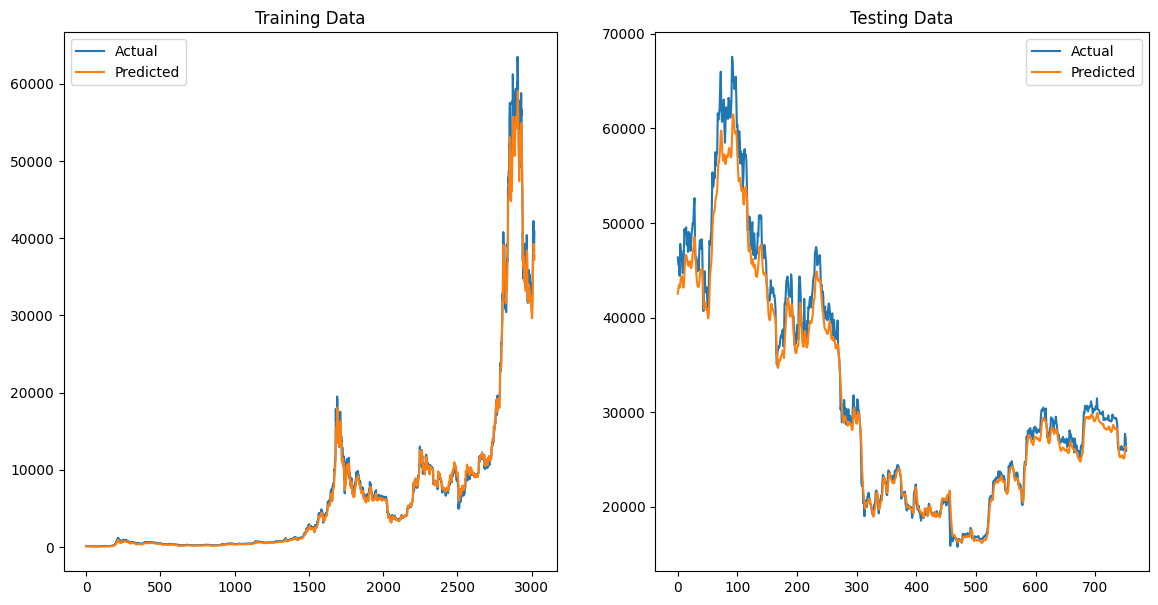

In [40]:
lstm_model1.train_model(epochs=100, batch_size=32, early_stopping=True)
lstm_model1.save_model()  # Note: changed from lstm_model.save_model()
lstm_model1.make_predictions()
lstm_model1.evaluate_model()
lstm_model1.plot_history()
lstm_model1.plot_predictions()


In [41]:
stop

NameError: ignored

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block X - Enhanced_LSTM Class

In [42]:
class Enhanced_LSTM:
    def __init__(self, model_type, input_shape, units, dropout, dense_units, optimizer,
                 feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):

        logging.info(f"Initializing {model_type} model")

        self.model = Sequential()

        # Add specific architecture based on model_type
        if model_type == 'GRU' or model_type == 'LSTM':
            for i, unit in enumerate(units):
                return_sequences = True if i < len(units) - 1 else False
                if model_type == 'GRU':
                    self.model.add(GRU(units=unit, input_shape=input_shape, return_sequences=return_sequences))
                else:
                    self.model.add(LSTM(units=unit, input_shape=input_shape, return_sequences=return_sequences))
                self.model.add(Dropout(dropout))

        elif model_type == 'CNN-LSTM':
            self.model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
            self.model.add(Dropout(dropout))
            self.model.add(LSTM(units=units[0]))

        self.model.add(Dense(units=dense_units))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        # Parameters for saving the model
        self.params = {
            'model_type': model_type,
            'input_shape': input_shape,
            'units': units,
            'dropout': dropout,
            'dense_units': dense_units,
            'optimizer': optimizer
        }

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                 'Predicted': self.train_predictions.squeeze()})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                'Predicted': self.test_predictions.squeeze()})
        logging.info("Predictions made")

    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"{self.params['model_type']}_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [43]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train, y_train, X_test, y_test = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

LSTM Data Shapes:
X_train_seq: (3020, 3, 5)
y_train_seq: (3020, 1)
X_test_seq: (753, 3, 5)
y_test_seq: (753, 1)
----


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                11200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
76/76 [==============================] - 4s 16ms/step - loss: 0.0011 - val_loss: 0.0485
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0145
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 6.5584e-04 - val_loss: 0.0039
Epoch 4/100


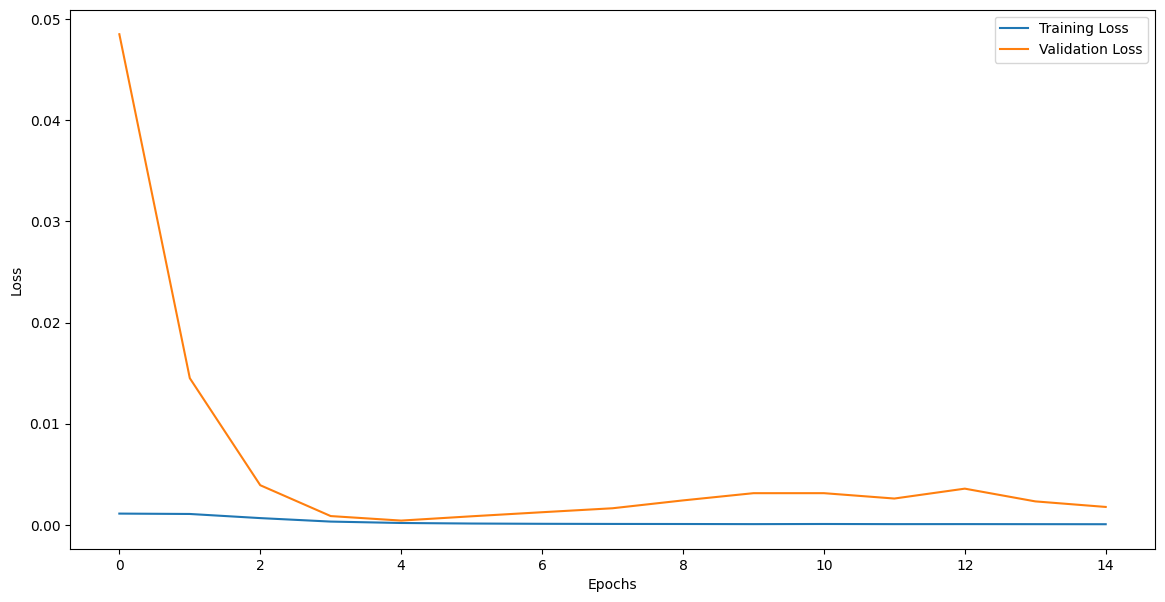

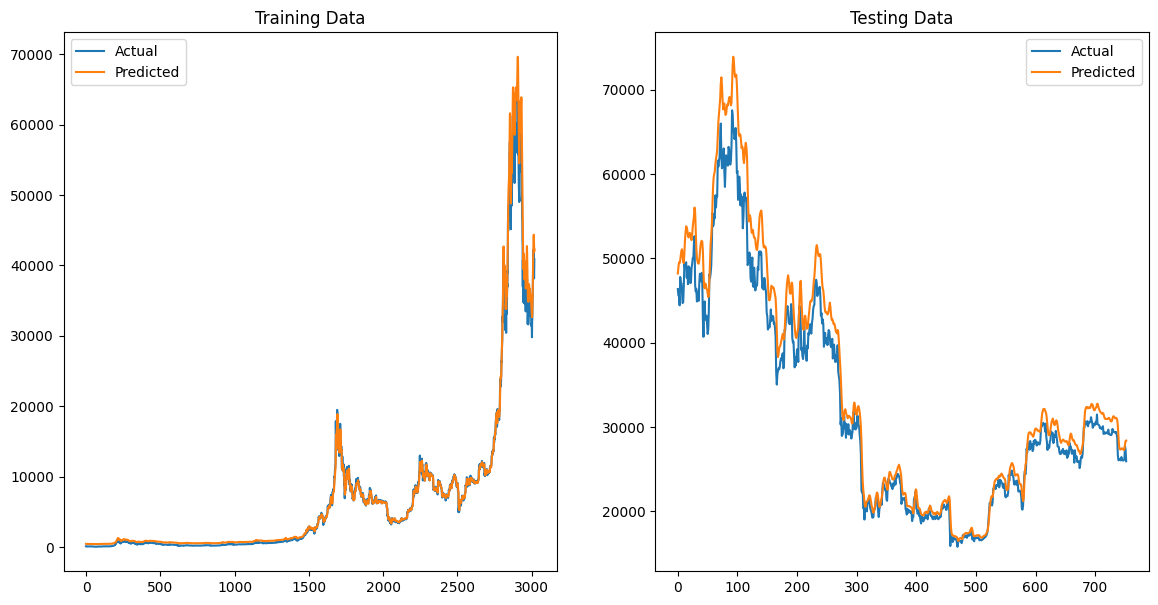

In [44]:
model = Enhanced_LSTM(
    model_type='LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single layer with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)


model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 3, 50)             11200     
                                                                 
 dropout_5 (Dropout)         (None, 3, 50)             0         
                                                                 
 lstm_6 (LSTM)               (None, 3, 50)             20200     
                                                                 
 dropout_6 (Dropout)         (None, 3, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

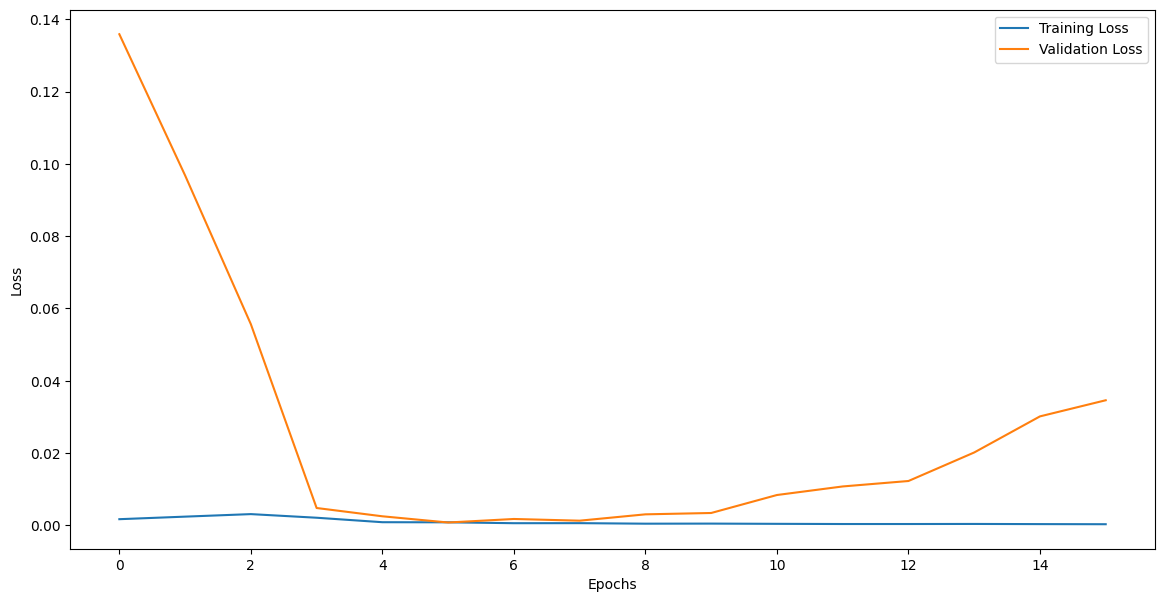

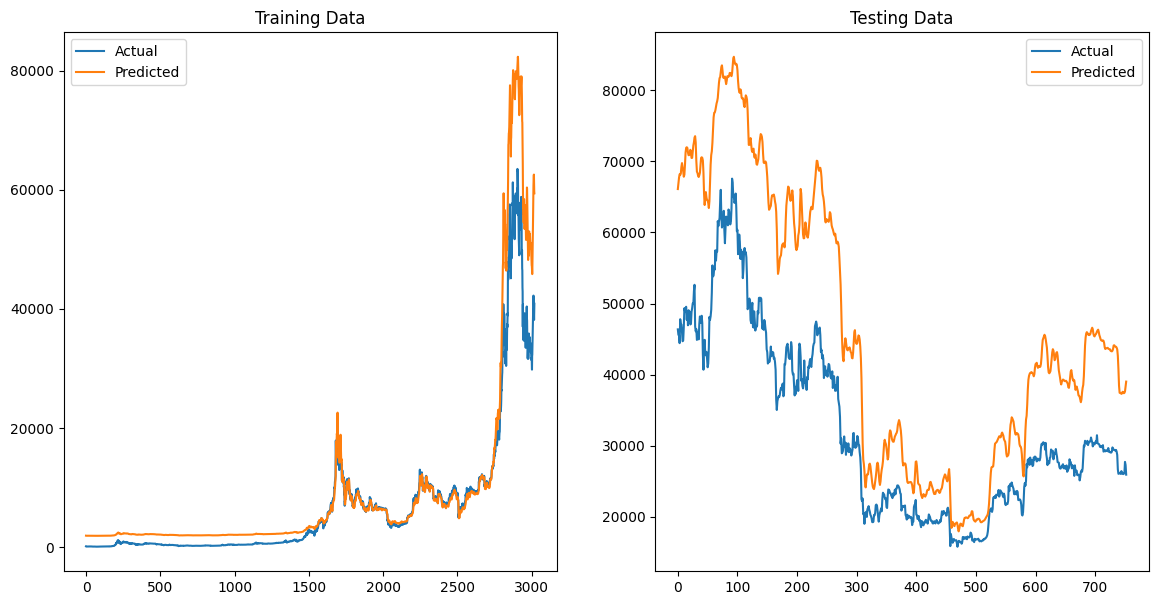

In [45]:
model = Enhanced_LSTM(
    model_type='LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50, 50],  # Three layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8550      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,601
Trainable params: 8,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
76/76 [==============================] - 3s 10ms/step - loss: 0.0011 - val_loss: 0.0476
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 5.3798e-04 - val_loss: 0.0043
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 1.7032e-04 - val_loss: 0.0013
Epoch 4/10

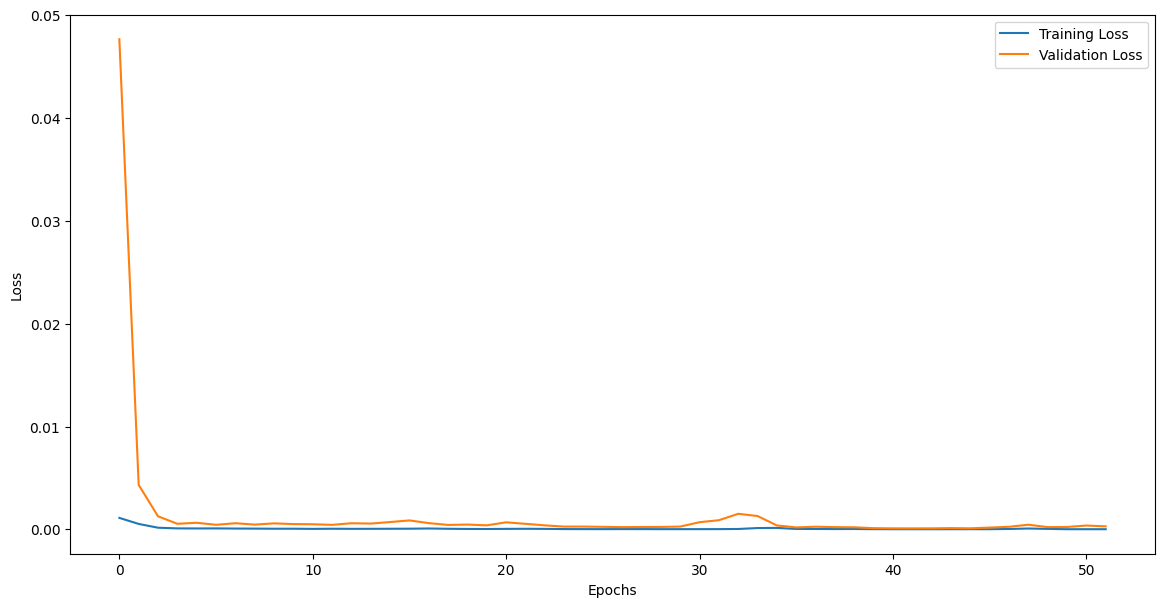

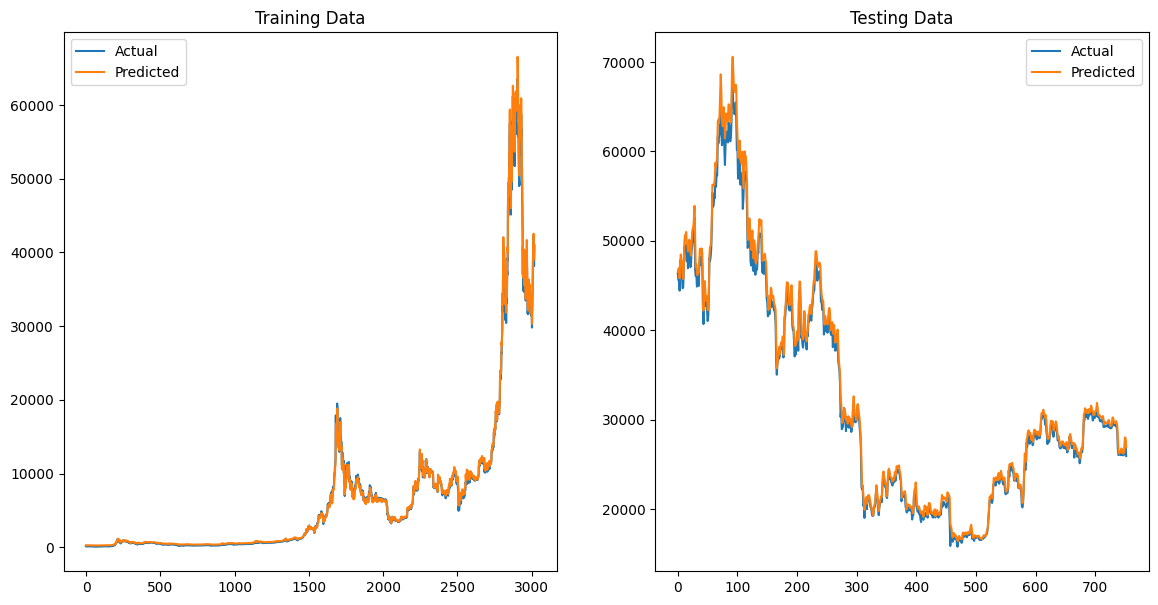

In [46]:
model = Enhanced_LSTM(
    model_type='GRU',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single layer with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 3, 50)             8550      
                                                                 
 dropout_9 (Dropout)         (None, 3, 50)             0         
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
76/76 [==============================]

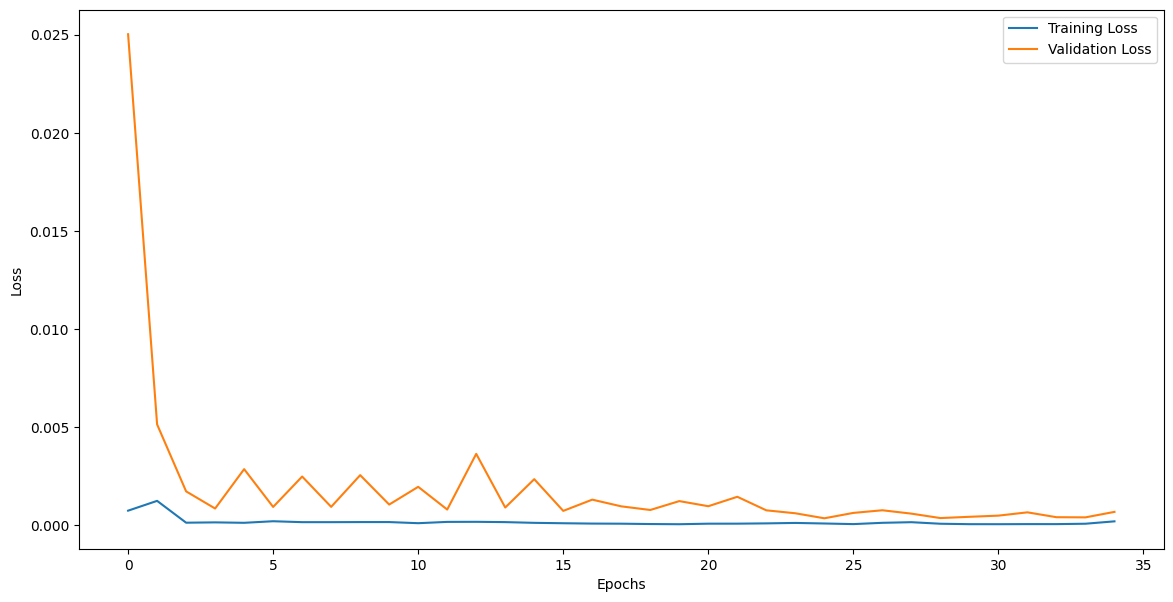

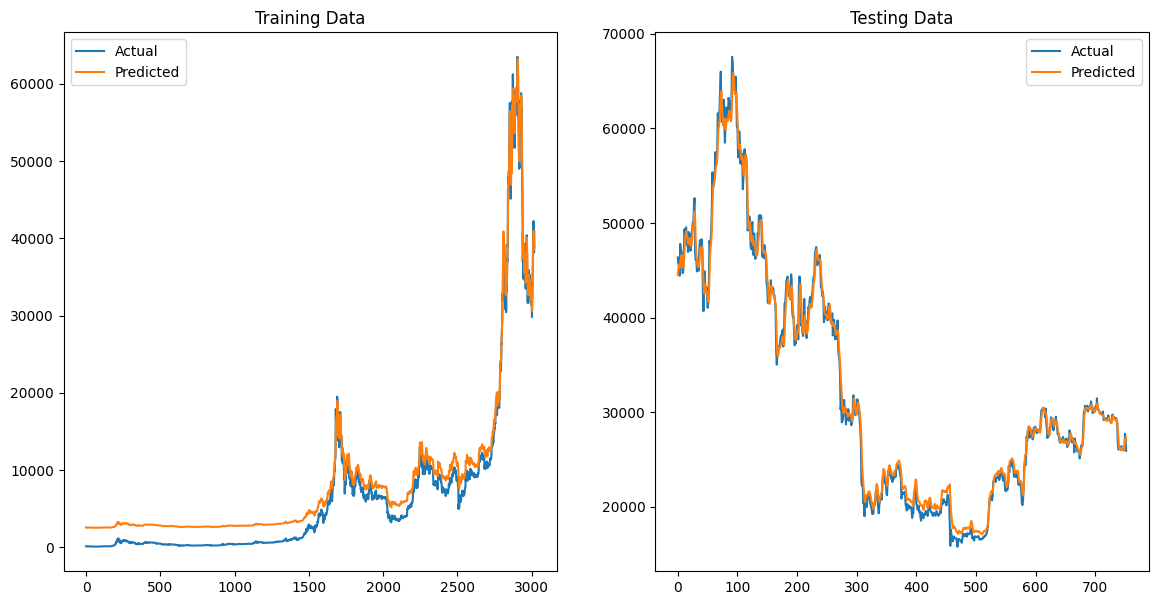

In [47]:
model = Enhanced_LSTM(
    model_type='GRU',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50],  # Two layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             1024      
                                                                 
 dropout_11 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                23000     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 24,075
Trainable params: 24,075
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
76/76 [==============================] - 4s 10ms/step - loss: 0.0014 - val_loss: 0.0465
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0019 - 

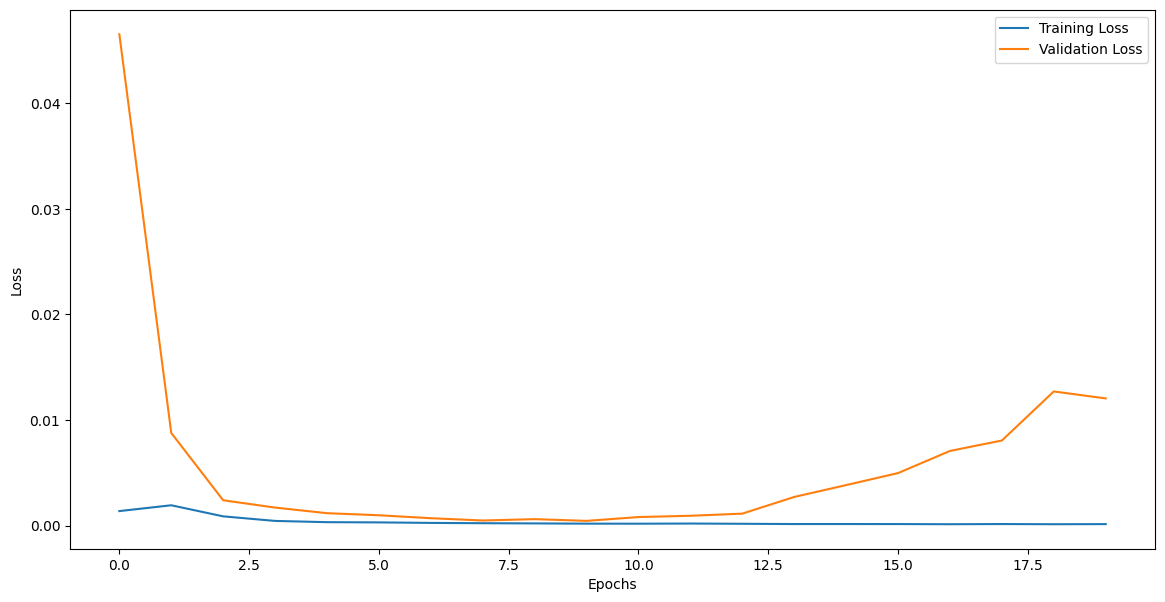

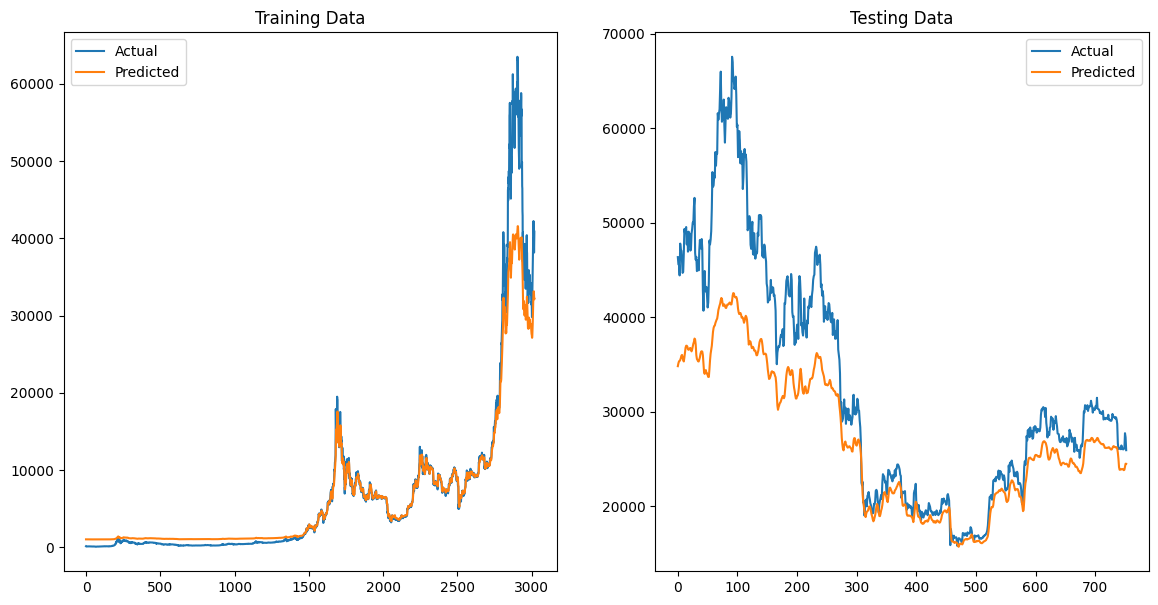

In [48]:
model = Enhanced_LSTM(
    model_type='CNN-LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single LSTM layer with 50 units after CNN
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             1024      
                                                                 
 dropout_12 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                23000     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 24,075
Trainable params: 24,075
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
76/76 [==============================] - 4s 15ms/step - loss: 0.0011 - val_loss: 0.0331
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0014 - 

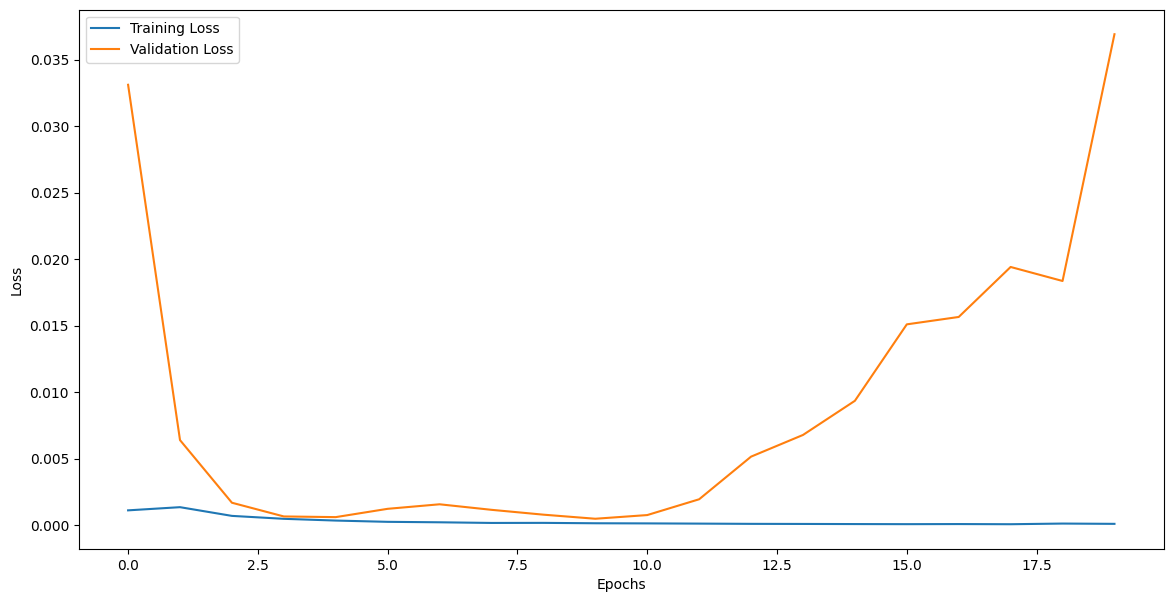

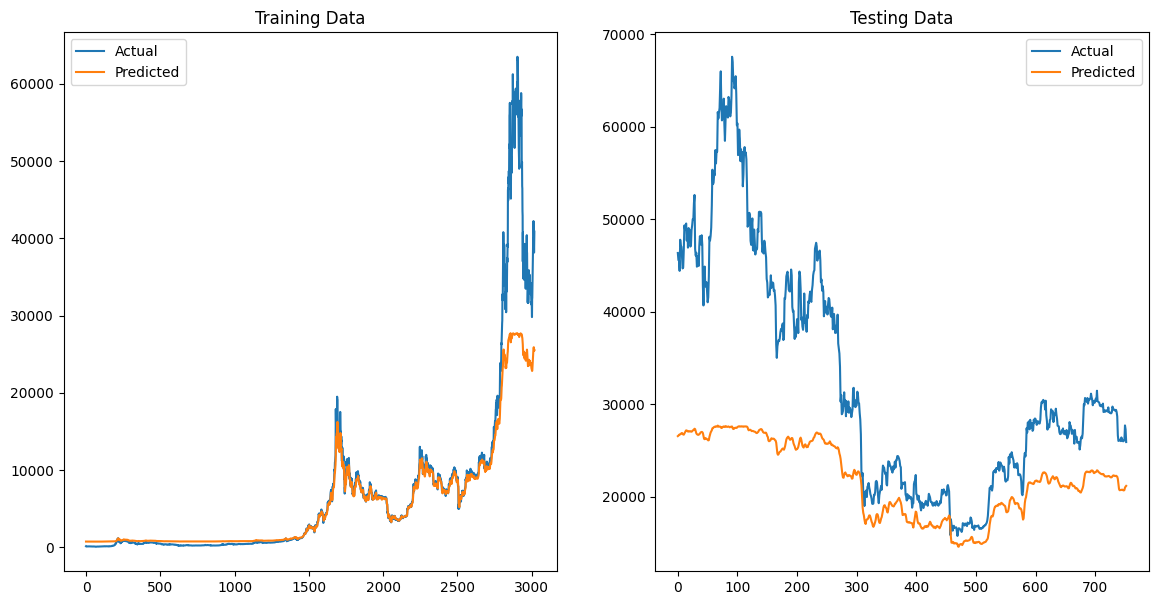

In [49]:
model = Enhanced_LSTM(
    model_type='CNN-LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50, 50],  # Three layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 5 - LSTM HyperTunning Grid-Search

In [8]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

2023-09-02 21:05:28,511 [INFO] - Initializing DataPreprocessor...
2023-09-02 21:05:28,512 [INFO] - Splitting data...
2023-09-02 21:05:28,515 [INFO] - Data split completed. X_train shape: (3023, 5), y_train shape: (3023,)
2023-09-02 21:05:28,515 [INFO] - Normalizing feature data...
2023-09-02 21:05:28,516 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:28,522 [INFO] - Feature data normalization completed.
2023-09-02 21:05:28,523 [INFO] - Normalizing target data...
2023-09-02 21:05:28,523 [INFO] - Getting scaler of type: MinMax
2023-09-02 21:05:28,524 [INFO] - Target data normalization completed.
2023-09-02 21:05:28,526 [INFO] - Preparing data for recurrent models with 3 timesteps...
2023-09-02 21:05:28,529 [INFO] - Generated 3020 sequences of shape (3, 5).
2023-09-02 21:05:28,532 [INFO] - Generated 753 sequences of shape (3, 5).
2023-09-02 21:05:28,534 [INFO] - Reshaping data for recurrent models...
2023-09-02 21:05:28,534 [INFO] - Data reshaped to (3020, 3, 5).
2023-09-02 21:0

LSTM Data Shapes:
X_train_seq: (3020, 3, 5)
y_train_seq: (3020, 1)
X_test_seq: (753, 3, 5)
y_test_seq: (753, 1)
----


In [9]:
import logging
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner import HyperModel
from kerastuner.tuners import BayesianOptimization
import tensorflow as tf

In [10]:

class EnhancedLSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        logging.info("Building LSTM model...")

        model = Sequential()
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")

        for i in range(num_layers):
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            logging.info(f"Layer {i+1}: Setting up LSTM with {units} units.")

            if i == 0:  # Only provide the input_shape for the first LSTM layer
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))

            model.add(BatchNormalization())

            dropout_rate = hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i+1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))

        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model

In [11]:
# Sample code to run the Bayesian Optimization
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
hypermodel = EnhancedLSTMHyperModel(input_shape=input_shape)
tuner = BayesianOptimization(
    hypermodel,
    objective='val_loss',
    max_trials=100,
    directory='bayesian_optimization',
    project_name='lstm'
)

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Start the search
tuner.search(X_train_lstm, y_train_lstm, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback, lr_schedule])


Trial 100 Complete [00h 04m 45s]
val_loss: 0.17396938800811768

Best val_loss So Far: 0.0008258205489255488
Total elapsed time: 01h 56m 12s
INFO:tensorflow:Oracle triggered exit


2023-09-02 23:01:42,203 [INFO] - Oracle triggered exit


In [13]:
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Display the best model's architecture
best_model.summary()
print(best_hyperparameters.values)

2023-09-03 03:00:40,060 [INFO] - Building LSTM model...
2023-09-03 03:00:40,060 [INFO] - Setting up 1 LSTM layers.
2023-09-03 03:00:40,060 [INFO] - Layer 1: Setting up LSTM with 128 units.


2023-09-03 03:00:40,078 [WARNING] - Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
2023-09-03 03:00:40,303 [INFO] - Layer 1: Setting up Dropout with rate 0.45.
2023-09-03 03:00:40,305 [INFO] - Setting up Dense layer with 2 units.
2023-09-03 03:00:40,333 [INFO] - Compiling model with optimizer adam and learning rate 0.001.
2023-09-03 03:00:40,350 [INFO] - Model built successfully!


2023-09-03 03:00:40,447 [WARNING] - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2023-09-03 03:00:40,447 [WARNING] - Value in checkpoint could not be found in the restored object: (root).optimizer.iter


2023-09-03 03:00:40,447 [WARNING] - Value in checkpoint could not be found in the restored object: (root).optimizer.beta_1


2023-09-03 03:00:40,463 [WARNING] - Value in checkpoint could not be found in the restored object: (root).optimizer.beta_2


2023-09-03 03:00:40,466 [WARNING] - Value in checkpoint could not be found in the restored object: (root).optimizer.decay


2023-09-03 03:00:40,470 [WARNING] - Value in checkpoint could not be found in the restored object: (root).optimizer.learning_rate


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 69,378
Trainable params: 69,122
Non-trainable params: 256
_________________________________________________________________
{'num_layers': 1, 'units_0': 128, 'recurrent_dropout_0': 0.05, 'activation_0': 'sigmoid', 'regularizer_0': 'l2', 'dr

# ------------------------------------------------------------------------------------------------------------------------------------------

In [34]:
import logging
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt

class Enhanced_LSTM:
    def __init__(self, config, input_shape, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):
        
        logging.info(f"Initializing LSTM model")
        
        self.model = Sequential()
        
        # Extract architecture details from the config
        self.num_layers = config['num_layers']

        for i in range(self.num_layers):
            units = config[f"units_{i}"]
            recurrent_dropout = config[f"recurrent_dropout_{i}"]
            activation = config[f"activation_{i}"]
            regularizer = config[f"regularizer_{i}"]
            dropout = config[f"dropout_{i}"]
            
            # Determine the kernel regularizer
            if regularizer == 'l1':
                kernel_regularizer = l1(0.01)
            elif regularizer == 'l2':
                kernel_regularizer = l2(0.01)
            elif regularizer == 'l1_l2':
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01)
            else:
                kernel_regularizer = None

            # Determine if the LSTM layer should return sequences
            return_sequences = True if i < self.num_layers - 1 else False
            
            # Add LSTM layer
             # Only the first LSTM layer should have the input_shape argument specified
            if i == 0:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, input_shape=input_shape, return_sequences=return_sequences))
            else:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, return_sequences=return_sequences))

            # Add Batch Normalization after each LSTM layer
            self.model.add(BatchNormalization())
            
            # Add Dropout layer
            self.model.add(Dropout(dropout))

        # Add Dense layer
        dense_units = config['dense_units']
        dense_activation = config['dense_activation']
        self.model.add(Dense(units=dense_units, activation=dense_activation))
        
        # Compile the model
        learning_rate = config['learning_rate']
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if config['optimizer'] == 'adam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Parameters for saving the model
        self.params = config

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train)[:, 0], 
                                                 'Predicted': self.train_predictions[:, 0]})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test)[:, 0], 
                                                'Predicted': self.test_predictions[:, 0]})
        logging.info("Predictions made")


    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a hash from the params
        params_string = str(self.params).encode('utf-8')
        params_hash = hashlib.md5(params_string).hexdigest()

        # Create a model name based on the parameters hash
        model_name = f"{self.params['model_type']}_model_{params_hash}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [35]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

2023-09-03 16:18:12,987 [INFO] - Initializing DataPreprocessor...
2023-09-03 16:18:12,990 [INFO] - Splitting data...
2023-09-03 16:18:12,998 [INFO] - Data split completed. X_train shape: (3023, 5), y_train shape: (3023,)
2023-09-03 16:18:12,999 [INFO] - Normalizing feature data...
2023-09-03 16:18:13,000 [INFO] - Getting scaler of type: MinMax
2023-09-03 16:18:13,010 [INFO] - Feature data normalization completed.
2023-09-03 16:18:13,011 [INFO] - Normalizing target data...
2023-09-03 16:18:13,013 [INFO] - Getting scaler of type: MinMax
2023-09-03 16:18:13,016 [INFO] - Target data normalization completed.
2023-09-03 16:18:13,017 [INFO] - Preparing data for recurrent models with 3 timesteps...
2023-09-03 16:18:13,023 [INFO] - Generated 3020 sequences of shape (3, 5).
2023-09-03 16:18:13,032 [INFO] - Generated 753 sequences of shape (3, 5).
2023-09-03 16:18:13,035 [INFO] - Reshaping data for recurrent models...
2023-09-03 16:18:13,037 [INFO] - Data reshaped to (3020, 3, 5).
2023-09-03 16:1

LSTM Data Shapes:
X_train_seq: (3020, 3, 5)
y_train_seq: (3020, 1)
X_test_seq: (753, 3, 5)
y_test_seq: (753, 1)
----


In [36]:
config = {
    'model_type': 'LSTM',
    'num_layers': 4, 
    'units_0': 128, 'recurrent_dropout_0': 0.05, 'activation_0': 'sigmoid', 'regularizer_0': 'l2', 'dropout_0': 0.45,
    'units_1': 128, 'recurrent_dropout_1': 0.0, 'activation_1': 'relu', 'regularizer_1': 'l1_l2', 'dropout_1': 0.2,
    'units_2': 256, 'recurrent_dropout_2': 0.4, 'activation_2': 'tanh', 'regularizer_2': 'l1', 'dropout_2': 0.05,
    'units_3': 224, 'recurrent_dropout_3': 0.2, 'activation_3': 'tanh', 'regularizer_3': 'l1_l2', 'dropout_3': 0.15,
    'dense_units': 2, 
    'dense_activation': 'relu', 
    'learning_rate': 0.001, 
    'optimizer': 'adam'
}

model = Enhanced_LSTM(
    config=config,
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train_seq,
    y_train=y_train_seq,
    X_test=X_test_seq,
    y_test=y_test_seq,
    data=data
)


2023-09-03 16:18:13,370 [INFO] - Initializing LSTM model


2023-09-03 16:18:13,382 [WARNING] - Layer lstm_20 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


2023-09-03 16:18:13,573 [WARNING] - Layer lstm_21 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


2023-09-03 16:18:13,739 [WARNING] - Layer lstm_22 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


2023-09-03 16:18:14,132 [WARNING] - Layer lstm_23 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 3, 128)            68608     
                                                                 
 batch_normalization_18 (Bat  (None, 3, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 3, 128)            0         
                                                                 
 lstm_21 (LSTM)              (None, 3, 128)            131584    
                                                                 
 batch_normalization_19 (Bat  (None, 3, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 3, 128)           

2023-09-03 16:18:14,617 [INFO] - Training LSTM model


Epoch 1/100
76/76 [==============================] - 48s 439ms/step - loss: 79.4959 - val_loss: 21.3018
Epoch 2/100
76/76 [==============================] - 32s 416ms/step - loss: 10.1530 - val_loss: 4.2411
Epoch 3/100
76/76 [==============================] - 31s 413ms/step - loss: 2.1608 - val_loss: 1.0934
Epoch 4/100
76/76 [==============================] - 31s 413ms/step - loss: 0.6429 - val_loss: 0.6982
Epoch 5/100
76/76 [==============================] - 31s 405ms/step - loss: 0.4561 - val_loss: 0.6323
Epoch 6/100
76/76 [==============================] - 31s 412ms/step - loss: 0.4324 - val_loss: 0.6306
Epoch 7/100
76/76 [==============================] - 31s 411ms/step - loss: 0.4346 - val_loss: 0.6342
Epoch 8/100
76/76 [==============================] - 31s 412ms/step - loss: 0.4373 - val_loss: 0.6375
Epoch 9/100
76/76 [==============================] - 31s 410ms/step - loss: 0.4401 - val_loss: 0.6402
Epoch 10/100
76/76 [==============================] - 31s 410ms/step - loss: 0.

2023-09-03 16:26:51,282 [INFO] - Training completed
2023-09-03 16:26:51,492 [INFO] - Model saved at trained_models\LSTM_model_60e0cdb3f72857f1861f84b9290dcab8.h5
2023-09-03 16:26:51,492 [INFO] - Making predictions


24/24 [==============================] - 1s 34ms/step


2023-09-03 16:26:58,130 [INFO] - Predictions made
2023-09-03 16:26:58,134 [INFO] - Evaluating model
2023-09-03 16:26:58,150 [INFO] - Evaluation completed
2023-09-03 16:26:58,153 [INFO] - Plotting training history


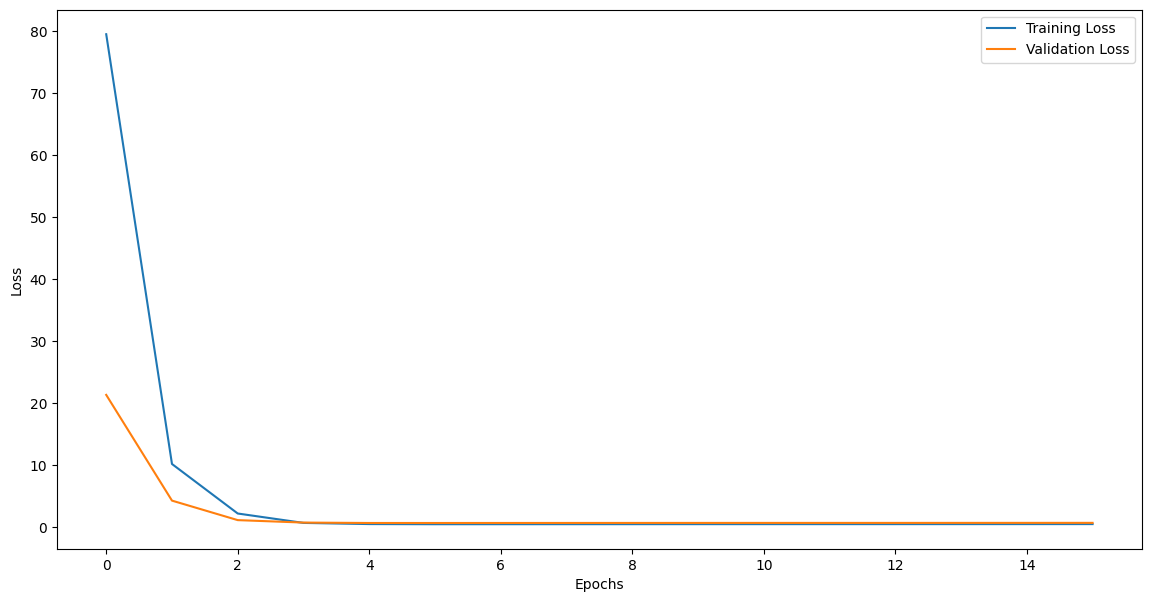

2023-09-03 16:26:58,665 [INFO] - Plotting completed
2023-09-03 16:26:58,669 [INFO] - Plotting predictions


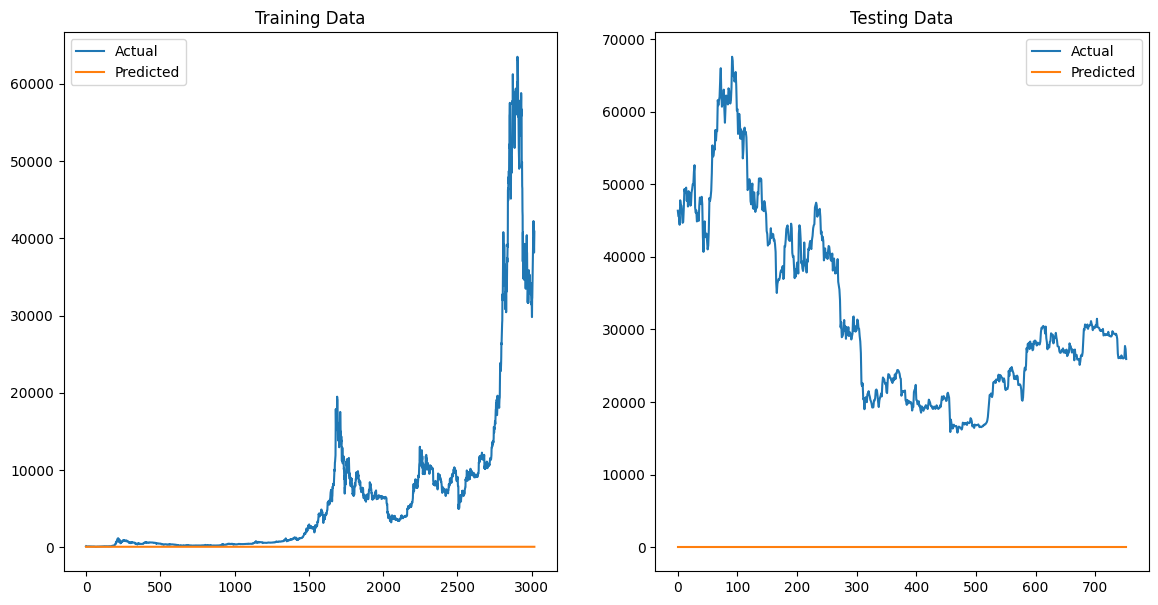

2023-09-03 16:26:59,363 [INFO] - Plotting completed


In [37]:
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 5 - LSTM HyperTunning Grid-Search

In [ ]:
class EnhancedLSTMHyperModel(HyperModel):
    """
    An enhanced LSTM hypermodel designed for use with Keras Tuner.

    This class constructs a Sequential LSTM model with tunable hyperparameters. It allows for the optimization
    of various model aspects including the number of LSTM layers, number of units in each LSTM layer, activation
    functions, regularization types, dropout rates, and more.

    The model is designed to be optimized for time series data, making it suitable for tasks such as forecasting
    or sequence prediction. The final layer of the model is a Dense layer with tunable units and activation function.

    Additionally, the model's learning rate and optimizer are also tunable, providing a wide range of
    configurations to search for the best performing model.

    Attributes:
    -----------
    - input_shape : tuple
        The shape of the input data, typically in the form of (timesteps, features), which defines the input
        for the LSTM layers.

    Hyperparameters:
    ----------------
    - num_layers : int
        The number of LSTM layers in the model. It can vary between 1 to 4.
    - units_i : int The number of units for the i-th LSTM layer. It can vary in steps of 32 from 32 to 256.
    - activation_i : {'tanh', 'sigmoid', 'relu'}
        Activation function for the i-th LSTM layer.
    - regularizer_i : {'l1', 'l2', 'l1_l2'}
        Regularization type for the i-th LSTM layer.
    - dropout_i : float
        Dropout rate after the i-th LSTM layer. It can vary from 0.0 to 0.5 in steps of 0.05.
    - dense_units : int
        The number of units in the Dense layer. It can vary between 1 to 3.
    - dense_activation : {'relu', 'linear', 'sigmoid', 'tanh'}
        Activation function for the Dense layer.
    - learning_rate : {1e-2, 1e-3, 1e-4}
        The learning rate for the optimizer.
    - optimizer : {'adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'}
        The optimizer type for training the model.

    Usage:
    ------
    The class is intended to be used with Keras Tuner's search space. An instance of the class can be passed
    to Keras Tuner's tuning algorithms like `RandomSearch`, `Hyperband`, etc., to find the best model
    configuration for a given dataset.
    """
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        logging.info("Building LSTM model...")

        model = Sequential()
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")

        for i in range(num_layers):
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            logging.info(f"Layer {i+1}: Setting up LSTM with {units} units.")

            if i == 0:  # Only provide the input_shape for the first LSTM layer
                model.add(LSTM(units=units,
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))

            dropout_rate = hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i+1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))

        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model

In [ ]:
preprocessor = DataPreprocessor(data, 'Close')
preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')
n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)


In [ ]:
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
hypermodel = EnhancedLSTMHyperModel(input_shape=input_shape)
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=100,
    executions_per_trial=2,
    directory='random_search',
    project_name='lstm'
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

tuner.search(X_train_seq, y_train_seq, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback])


In [ ]:
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Display the best model's architecture
best_model.summary()
print(best_hyperparameters.values)

# ------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

# Get preprocessed data and scalers
X_train, y_train, X_test, y_test = preprocessor.get_preprocessed_data()
feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import logging
import numpy as np
import os
import joblib
from datetime import datetime
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt

class Enhanced_Linear_Regression:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        # Setting up logging
        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        self._initialize_model()

    def _initialize_model(self):
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        elif self.config['regularization'] == 'elasticnet':
            self.model = ElasticNet(alpha=self.config['alpha'], l1_ratio=self.config.get('l1_ratio', 0.5))
            self.logger.info("ElasticNet regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """
        Train the Linear Regression model.
        """
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """
        Make predictions using the trained Linear Regression model for both training and test data.
        """
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        """
        Inverse scale the predictions to original scale using the target_scaler.
        """
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1))
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1))
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """
        Evaluate the model using various metrics and return the results for both training and test datasets.
        """
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            self.logger.info("Model evaluated successfully.")
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        """
        Save the trained model to the specified folder with a naming convention.

        Args:
        - version (str): Version of the model.
        """
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LR_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")



In [ ]:
from IPython.display import display
config = {
    'regularization': 'linear',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()
model.save_model_to_folder(version="final")

In [ ]:
# Configuration options
regularizations = [None, 'ridge', 'lasso', 'elasticnet']
alphas = [0.01, 0.1, 0.5, 1.0, 10.0]  # Example set of alpha values
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Placeholder to store results
results = []

# Iterate over all configurations
for reg in regularizations:
    for alpha in alphas:
        # Set up l1_ratios only for ElasticNet
        if reg == 'elasticnet':
            for l1_ratio in l1_ratios:
                config = {
                    'regularization': reg,
                    'alpha': alpha,
                    'l1_ratio': l1_ratio
                }

                model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
                model.train_model()
                model.make_predictions()
                model.inverse_scale_predictions()
                evaluation_results = model.evaluate_model()

                # Storing results along with configuration for comparison
                results.append({
                    'regularization': reg,
                    'alpha': alpha,
                    'l1_ratio': l1_ratio,
                    'train_rmse': evaluation_results.loc['Train', 'RMSE'],
                    'test_rmse': evaluation_results.loc['Test', 'RMSE'],
                    'train_r2': evaluation_results.loc['Train', 'R2 Score'],
                    'test_r2': evaluation_results.loc['Test', 'R2 Score'],
                })
        else:
            config = {
                'regularization': reg,
                'alpha': alpha
            }

            model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
            model.train_model()
            model.make_predictions()
            model.inverse_scale_predictions()
            evaluation_results = model.evaluate_model()

            # Storing results along with configuration for comparison
            results.append({
                'regularization': reg,
                'alpha': alpha,
                'train_rmse': evaluation_results.loc['Train', 'RMSE'],
                'test_rmse': evaluation_results.loc['Test', 'RMSE'],
                'train_r2': evaluation_results.loc['Train', 'R2 Score'],
                'test_r2': evaluation_results.loc['Test', 'R2 Score'],
            })

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Sort or filter results_df as needed for analysis
# For example, to sort by test RMSE:
sorted_results = results_df.sort_values(by='test_rmse')

print(sorted_results)


# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 9 - AutoArima

In [ ]:
# Assuming 'Close' is your target column
preprocessor = DataPreprocessing(data, ['Close'])
scaled_data = preprocessor.data_scaled
train_data, test_data = preprocessor.split_data(test_size=0.2)
y_train, y_test, X_train, X_test = preprocessor.prepare_data_SARIMAX('Close', ['Volume'])
y_train, y_test, X_train, X_test = preprocessor.prepare_data_SARIMAX('Close')

In [ ]:
class SARIMAModel:
    def __init__(self, train, test, exog_train=None, exog_test=None):
        logger.info("Initializing SARIMAModel class")
        self.train = train
        self.test = test
        self.exog_train = exog_train
        self.exog_test = exog_test
        self.model = None
        self.predictions = None

    def auto_fit(self, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True):
        logger.info("Starting auto_fit...")
        try:
            self.model = pm.auto_arima(self.train, exogenous=self.exog_train, seasonal=seasonal, m=m, trace=trace, error_action=error_action, suppress_warnings=suppress_warnings)
            logger.info("Auto_fit completed successfully.")
        except Exception as e:
            logger.error(f"Auto_fit failed with error: {e}")
            raise

    def make_predictions(self,start, end):
        if self.model is None:
            logger.error("Model not fitted yet.")
            return
        logger.info("Making predictions...")
        self.predictions = self.model.predict(n_periods=len(self.test), exogenous=self.exog_test)
        return self.predictions

    def evaluate_model(self):
        if self.model is None or self.predictions is None:
            logger.error("Model not fitted or predictions not made yet.")
            return
        mse = mean_squared_error(self.test, self.predictions)
        mae = mean_absolute_error(self.test, self.predictions)
        r2 = r2_score(self.test, self.predictions)

        logger.info(f'MSE: {mse}')
        logger.info(f'MAE: {mae}')
        logger.info(f'R2 Score: {r2}')

    def plot_predictions(self):
        if self.model is None or self.predictions is None:
            logger.error("Model not fitted or predictions not made yet.")
            return
        logger.info("Plotting predictions")
        plt.figure(figsize=(10,5))
        plt.plot(self.test, label='Actual')
        plt.plot(self.predictions, label='Predicted')
        plt.title('Test Data vs Predicted Data')
        plt.legend()
        plt.show()

    def save_model(self):
        model_name = "sarima_model.joblib"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        dump(self.model, model_path)
        logger.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load(model_path)
        logger.info(f"Model loaded from {model_path}")
        return loaded_model

In [ ]:
# Initialize the SARIMAModel class
model = SARIMAModel(y_train, y_test)# Fit the SARIMA model with seasonal set to True and m set to 12 for monthly data
model.auto_fit(seasonal=True, m=12)
model.save_model()  # save the model
# Make predictions for the length of the test set
model.make_predictions(start=len(y_train), end=len(y_train) + len(y_test) - 1)
# Evaluate the model
model.evaluate_model()
# Plot the actual vs predicted values
model.plot_predictions()

# ------------------------------------------------------------------------------------------------------------------------------------------